

**EVALUATION OF ADVANCED TRAUMA MASS COMBAT TRAINING**

TEAM 9 - SCCM DATATHON 2025
19TH JULY 2025 - 20TH JULY 2025

*Disclaimer: Pair programming with Generative AI was used for this project*



In [ ]:
from datetime import timedelta
import os

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from IPython.display import display, HTML, Image
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})


from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery


client = bigquery.Client(project='sccm-2025')

ImportError: cannot import name 'bigquery' from 'google.cloud' (unknown location)

**Link for AUTODOC Videos**


https://console.cloud.google.com/storage/browser/sccm--autodoc2025?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&authuser=1&inv=1&invt=Ab3Luw

**SAMPLE**

In [ ]:
dataset_id = 'AutoDoc'
treatment_list_table_id = 'Treatment List'
query_treatment = f"SELECT * FROM `sccm-discovery.{dataset_id}.{treatment_list_table_id}` LIMIT 1000"
treatment_df = client.query(query_treatment).to_dataframe()
treatment_df.shape

NameError: name 'client' is not defined

In [ ]:
treatment_df['trtmt_type'].isnull().sum()

np.int64(2)

**ANNOTATIONS**

Exploring the annotations table in the dataset

In [ ]:
dataset_id = 'AutoDoc'
annotations_list_table_id = 'Annotations'
query_annotations = f"SELECT * FROM `sccm-discovery.{dataset_id}.{annotations_list_table_id}` LIMIT 1000"
annotations_df = client.query(query_annotations).to_dataframe()
display(annotations_df.head(50))

NameError: name 'client' is not defined

In [ ]:
# Tasks presaent
annotations_df['task'].value_counts()


,count
task,
Chest Seal Application,85
Tourniquet Application,70
StartEx,66
Time Sync,65
ENDEX,64
Nasopharyngeal Airway,62
Chest Needle Decompression,58
Documentation,54
Administer Medication,42


**TIME TAKEN TO COMPLETE EACH TASKS IN THE ANNOTATIONS TABLE**

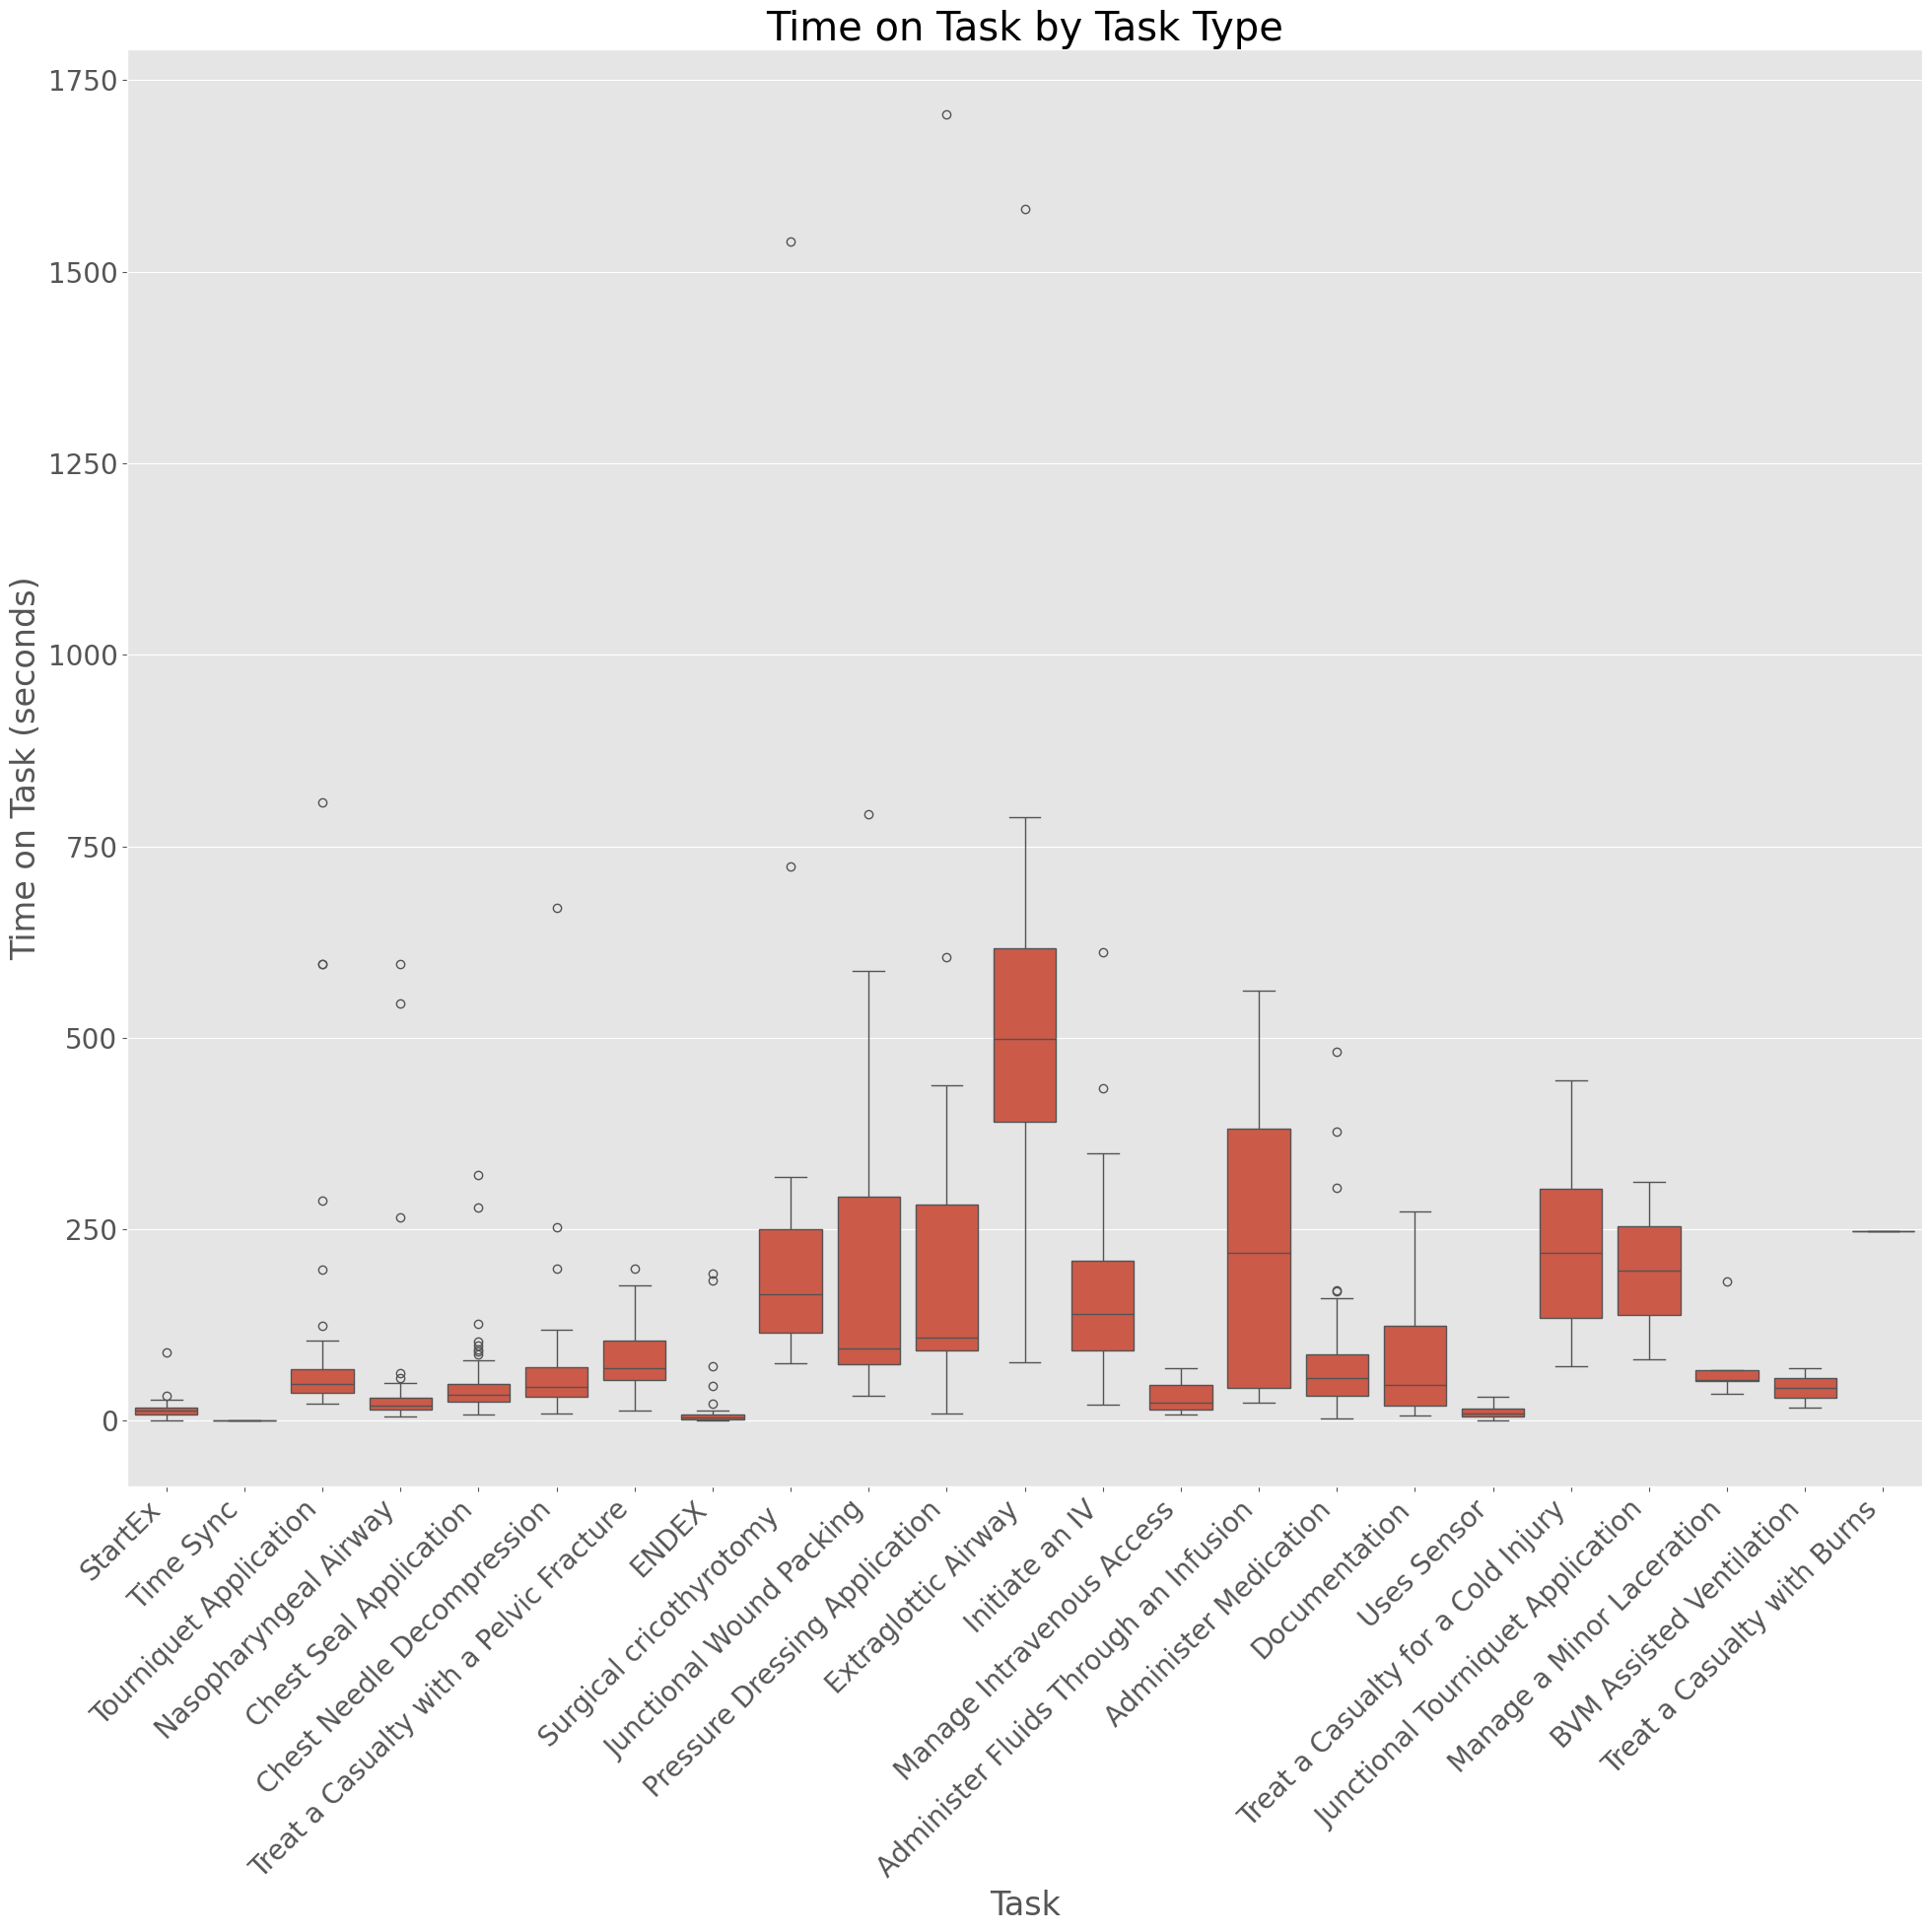

In [ ]:
annotations_df['time_on_task_sec'] = annotations_df['time_on_task'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
plt.figure(figsize=(20, 20))
sns.boxplot(data=annotations_df, x='task', y='time_on_task_sec')
plt.title('Time on Task by Task Type')
plt.ylabel('Time on Task (seconds)')
plt.xlabel('Task')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 38.8% of the points cannot be plac

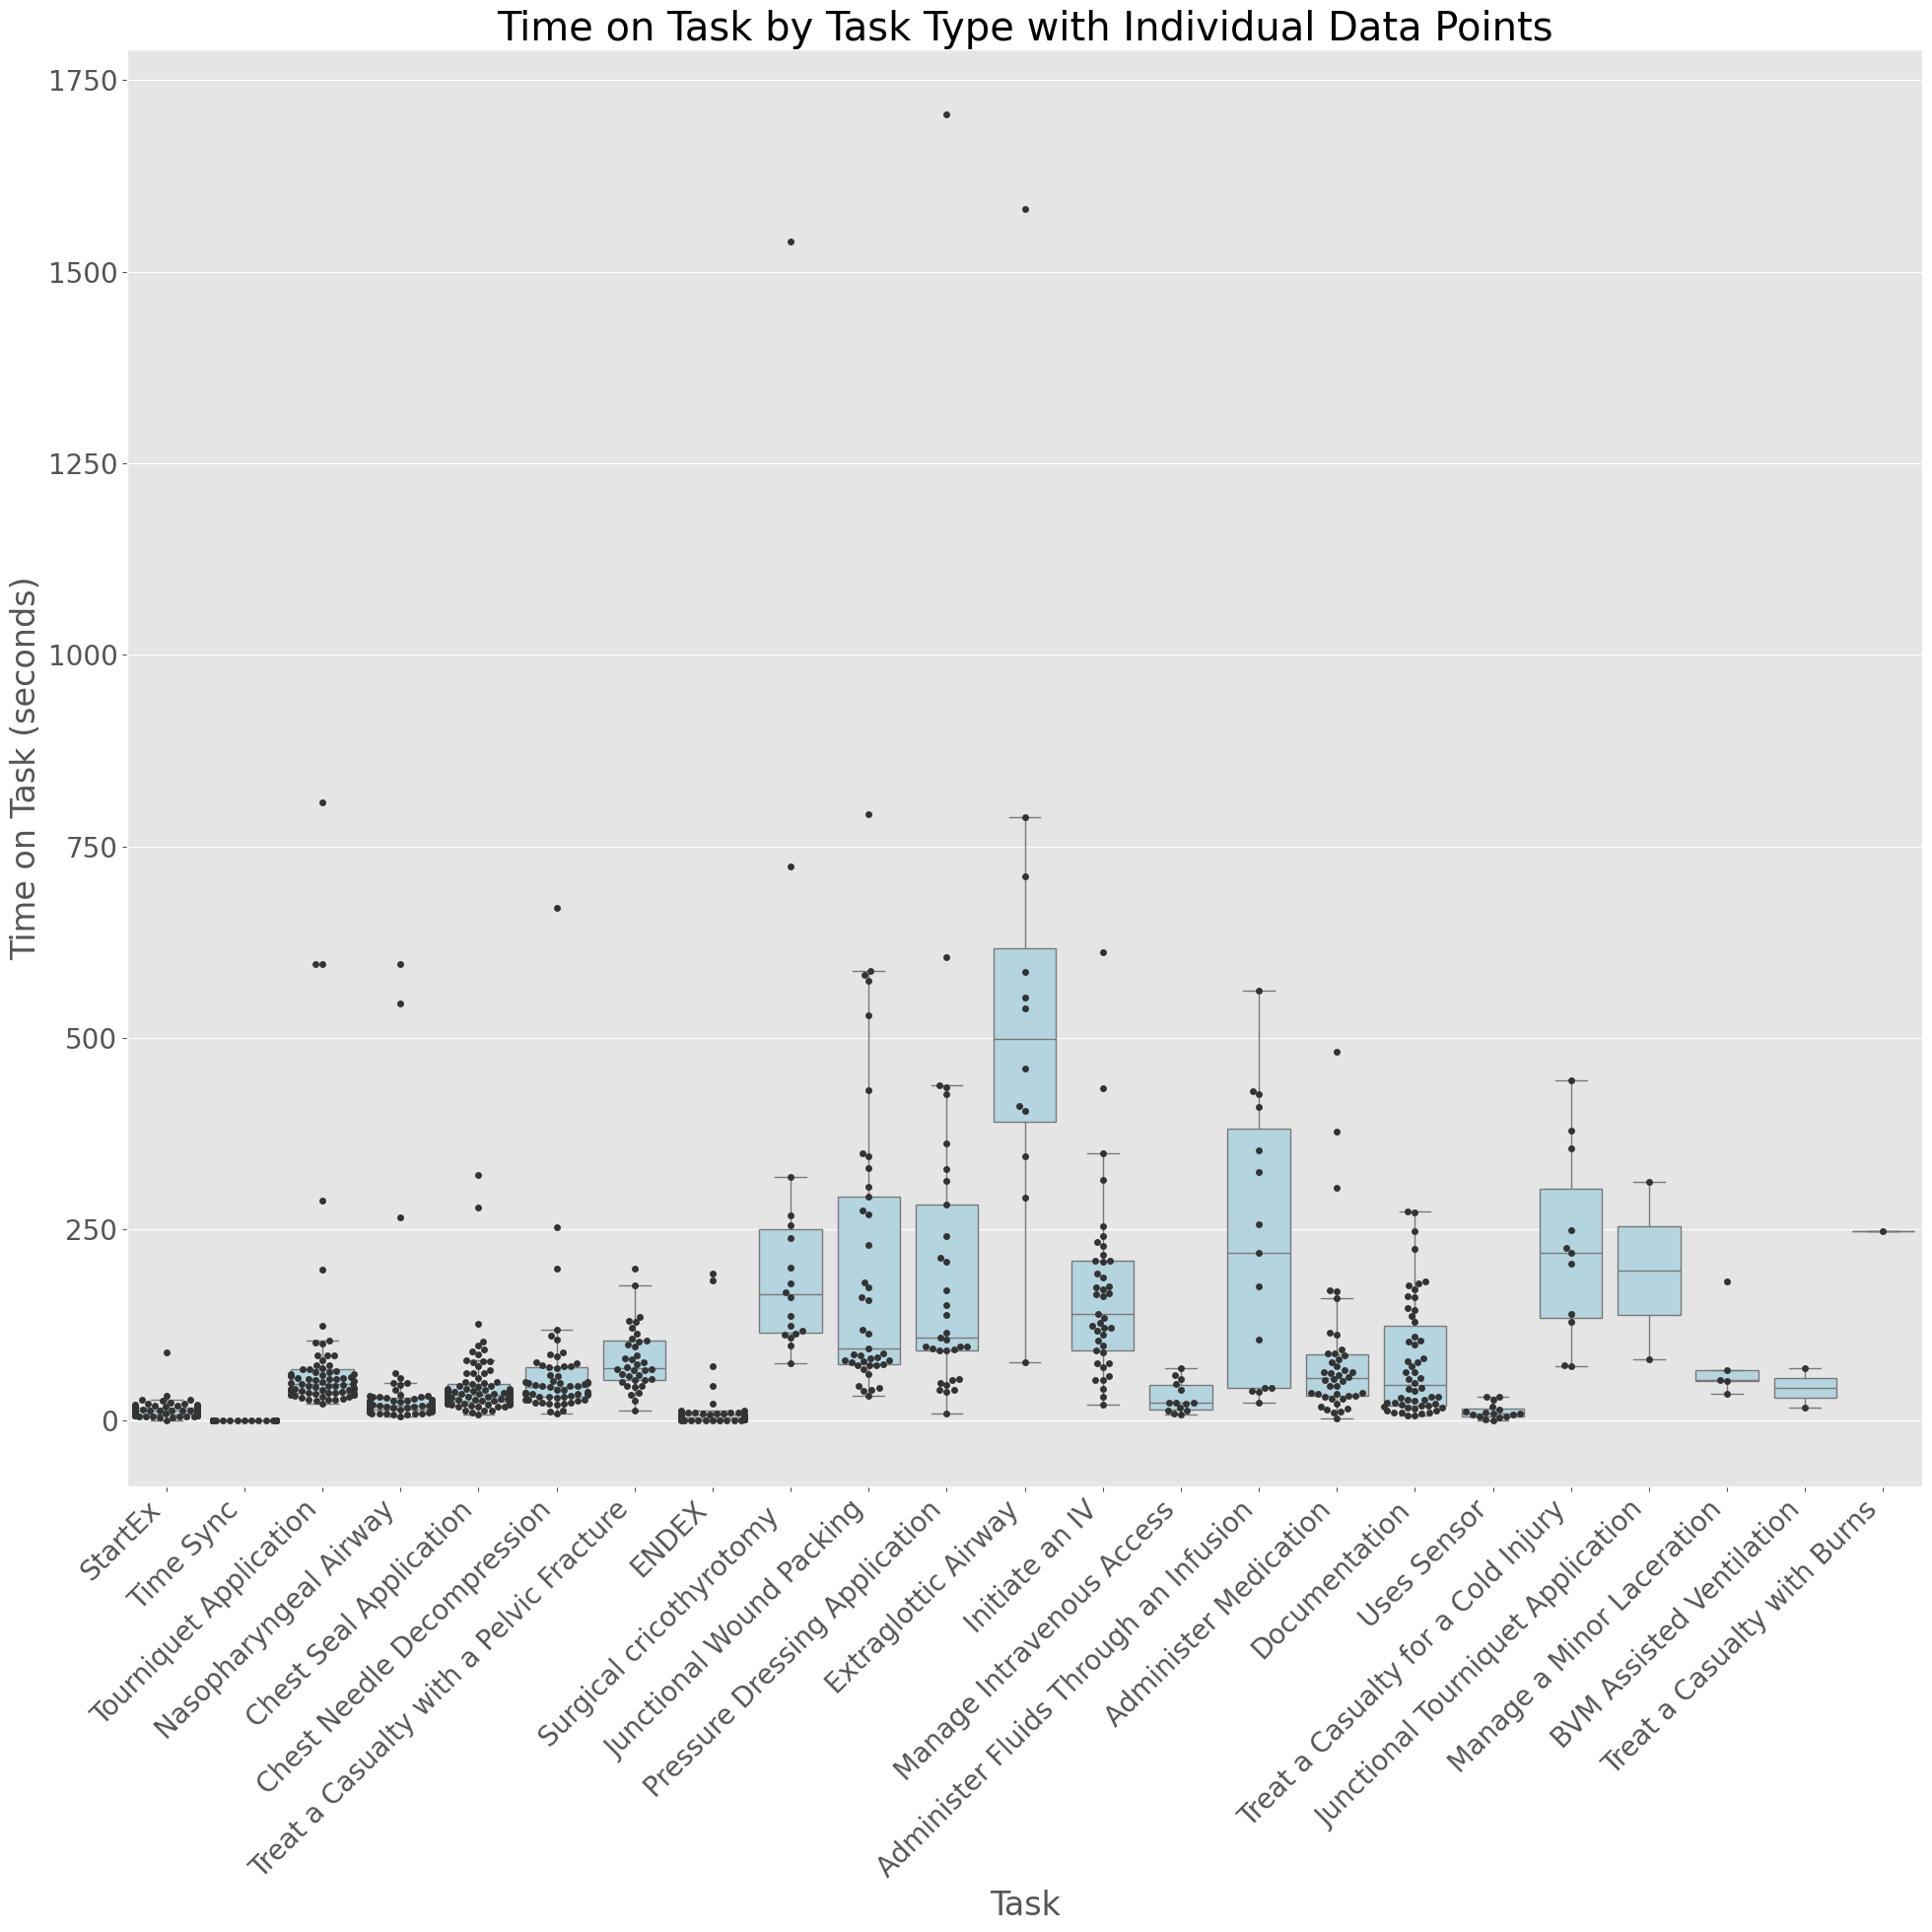

In [ ]:
annotations_df['time_on_task_sec'] = annotations_df['time_on_task'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
plt.figure(figsize=(20, 20))
sns.boxplot(data=annotations_df, x='task', y='time_on_task_sec', color='lightblue', showfliers=False) # showfliers=False to avoid plotting outliers twice
sns.swarmplot(data=annotations_df, x='task', y='time_on_task_sec', color='0.2')
plt.title('Time on Task by Task Type with Individual Data Points')
plt.ylabel('Time on Task (seconds)')
plt.xlabel('Task')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**TIME TAKEN TO START THE TASK**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 89.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.5% of the points cannot be plac

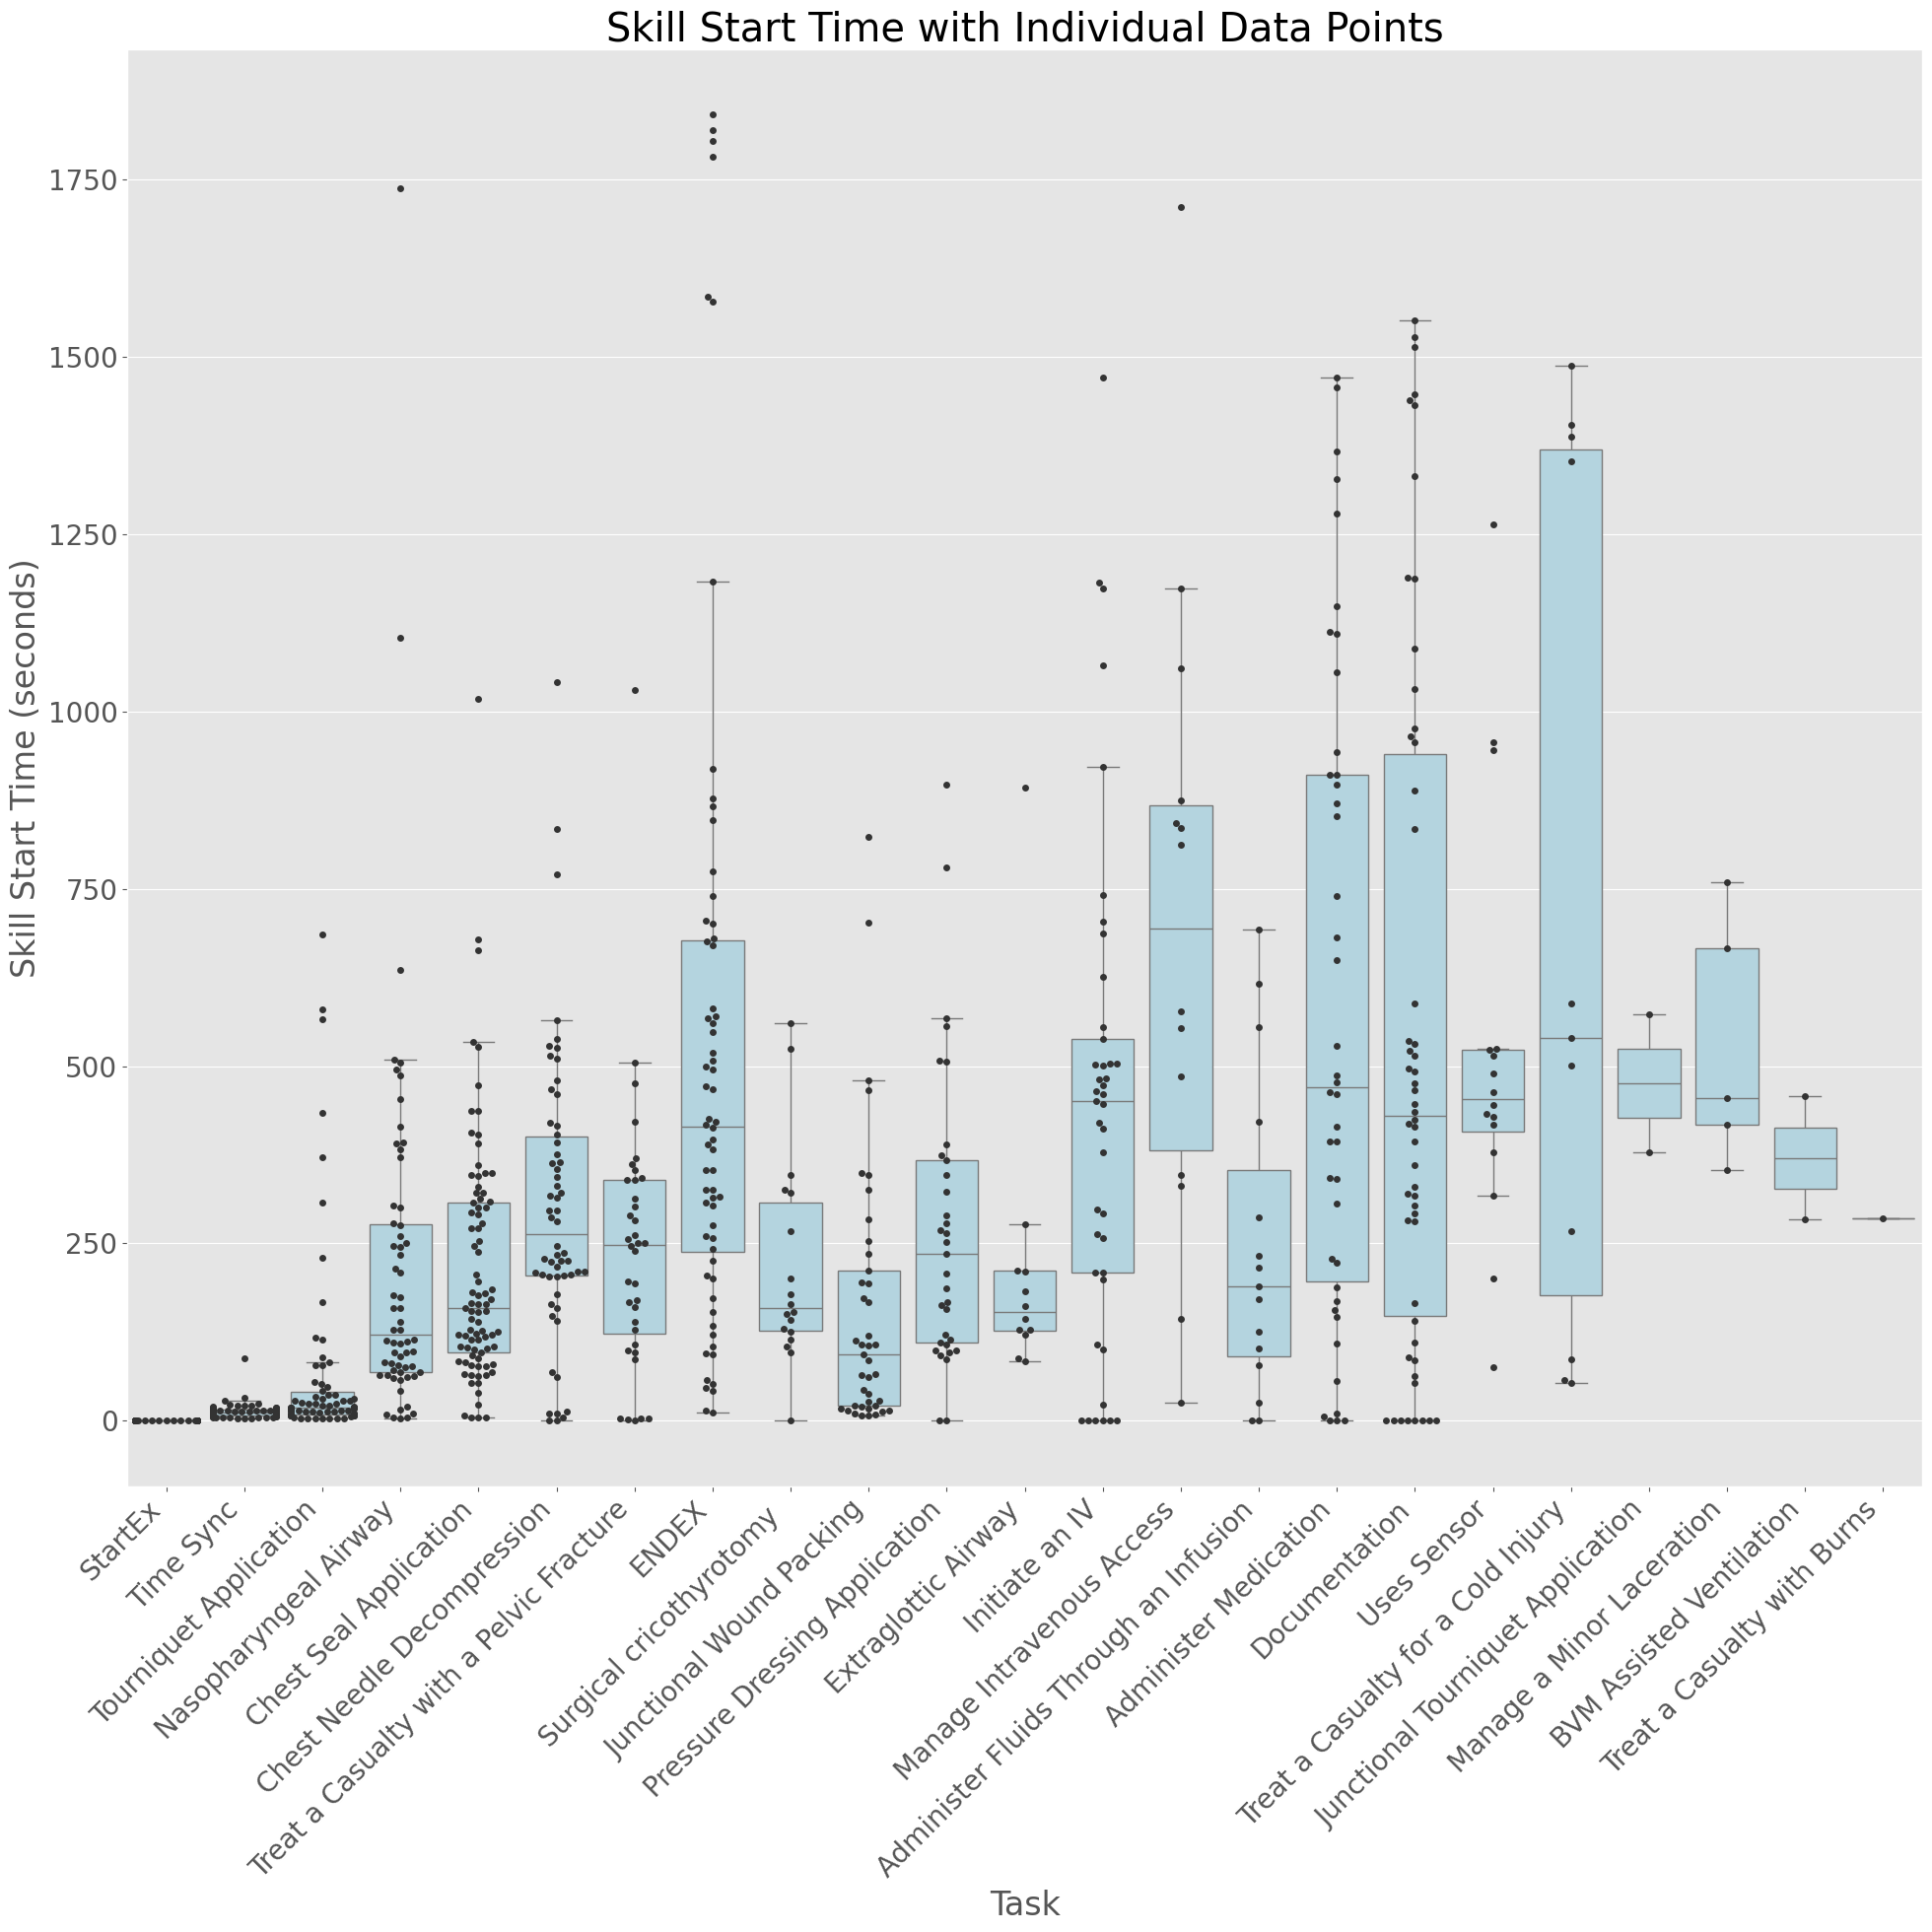

In [ ]:
annotations_df['skill_start_time_sec'] = annotations_df['skill_start_time_hh:mm:ss'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
plt.figure(figsize=(20, 20))
sns.boxplot(data=annotations_df, x='task', y='skill_start_time_sec', color='lightblue', showfliers=False)
sns.swarmplot(data=annotations_df, x='task', y='skill_start_time_sec', color='0.2')
plt.title('Skill Start Time with Individual Data Points')
plt.ylabel('Skill Start Time (seconds)')
plt.xlabel('Task')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**EXPLORATION OF THE SIMULATIONS DATA**

In [ ]:
dataset_id = 'AutoDoc'
simulation_table_id = 'Simulation Data'
query_simulation = f"SELECT * FROM `sccm-discovery.{dataset_id}.{simulation_table_id}` LIMIT 1000"
simulation_df = client.query(query_simulation).to_dataframe()
display(simulation_df.head())

**EXPLORATION OF THE AIRWAY MANAGEMENT**

In [ ]:
chest_seal_file_ids = annotations_df[annotations_df['task'] == 'Chest Seal Application']['file_id'].unique().tolist()
chest_seal_series = pd.Series(chest_seal_file_ids)
chest_seal_series.to_csv('chest_seal_file_ids.csv', index=False)

File IDs for 'Chest Seal Application' saved to 'chest_seal_file_ids.csv'


In [ ]:
print(chest_seal_file_ids)
print(len(chest_seal_file_ids))

[42, 33, 75, 59, 51, 46, 71, 37, 66, 20, 4, 17, 79, 81, 60, 24, 13, 23, 65, 14, 61, 3, 63, 38, 18, 69, 49, 41, 76, 62, 45, 72, 52, 80, 12, 16, 5, 21, 67, 78, 50, 58, 36, 70, 47, 74, 32, 43, 73, 35, 44, 68, 19, 40, 11, 57, 26, 48, 39, 6, 15, 22]
62


In [ ]:
task_counts = annotations_df.groupby(['file_id', 'task']).size().reset_index(name='count')
chest_seal_multiple_applications = task_counts[(task_counts['task'] == 'Chest Seal Application') & (task_counts['count'] > 1)]
if not chest_seal_multiple_applications.empty:
    print("File IDs where 'Chest Seal Application' was done more than once:")
    print(chest_seal_multiple_applications['file_id'].tolist())
else:
    print("No files found where 'Chest Seal Application' was done more than once.")

print(len(chest_seal_multiple_applications))


File IDs where 'Chest Seal Application' was done more than once:
[11, 12, 13, 14, 15, 19, 21, 23, 39, 40, 41, 42, 43, 44, 45, 62, 65, 66, 68, 72, 75, 76, 81]
23


In [ ]:
chest_needle_file_ids = annotations_df[annotations_df['task'] == 'Chest Needle Decompression']['file_id'].unique().tolist()
chest_needle_series = pd.Series(chest_needle_file_ids)
chest_needle_series.to_csv('chest_needle_file_ids.csv', index=False)
print(chest_needle_file_ids)
print(len(chest_needle_file_ids))

[42, 75, 59, 28, 71, 66, 51, 4, 17, 79, 81, 60, 13, 65, 14, 52, 61, 27, 3, 63, 49, 69, 41, 76, 30, 62, 45, 72, 80, 12, 16, 5, 50, 21, 67, 78, 29, 58, 70, 47, 43, 73, 44, 31, 77, 40, 11, 57, 26, 48, 39, 6, 15]
53


In [ ]:
task_counts = annotations_df.groupby(['file_id', 'task']).size().reset_index(name='count')
chest_needle_multiple_applications = task_counts[(task_counts['task'] == 'Chest Needle Decompression') & (task_counts['count'] > 1)]
if not chest_needle_multiple_applications.empty:
    print("File IDs where 'Chest Needle Decompression' was done more than once:")
    print(chest_needle_multiple_applications['file_id'].tolist())
else:
    print("No files found where 'Chest Needle Decompression' was done more than once.")

print(len(chest_needle_multiple_applications))

File IDs where 'Chest Needle Decompression' was done more than once:
[26, 28, 62, 67]
4


**EXPLORING CORRELATIONS BETWEEN TASKS**

In [ ]:
# chest_needle_decompression_files = set(annotations_df[annotations_df['task'] == 'Chest Needle Decompression']['file_id'].unique())
# chest_seal_application_files = set(annotations_df[annotations_df['task'] == 'Chest Seal Application']['file_id'].unique())
# files_with_both_tasks = list(chest_needle_decompression_files.intersection(chest_seal_application_files))

# print("File IDs with both 'Chest Needle Decompression' and 'Chest Seal Application':")
# print(files_with_both_tasks)
# print(f"Number of files with both tasks: {len(files_with_both_tasks)}")

# both_tasks_df = annotations_df[
#     annotations_df['file_id'].isin(files_with_both_tasks) &
#     annotations_df['task'].isin(['Chest Needle Decompression', 'Chest Seal Application'])
# ].copy()
# correlation_data = both_tasks_df.groupby(['file_id', 'task'])['time_on_task_sec'].mean().unstack()
# correlation_data.columns = ['Chest Needle Decompression Time', 'Chest Seal Application Time']
# correlation_data.dropna(inplace=True)
# print("\nData for correlation:")
# display(correlation_data)
# correlation_coefficient = correlation_data['Chest Needle Decompression Time'].corr(correlation_data['Chest Seal Application Time'])

# print(f"\nCorrelation coefficient between 'Chest Needle Decompression' and 'Chest Seal Application' time_on_task: {correlation_coefficient:.4f}")


# plt.figure(figsize=(10, 8))
# sns.scatterplot(data=correlation_data, x='Chest Needle Decompression Time', y='Chest Seal Application Time')
# plt.title('Correlation between Time on Task for Chest Needle Decompression and Chest Seal Application')
# plt.xlabel('Chest Needle Decompression Time (seconds)')
# plt.ylabel('Chest Seal Application Time (seconds)')
# plt.grid(True)
# plt.show()

In [ ]:
# chest_needle_decompression_files = set(annotations_df[annotations_df['task'] == 'Chest Needle Decompression']['file_id'].unique())
# surgical_cricothyrotomy_files = set(annotations_df[annotations_df['task'] == 'Surgical cricothyrotomy']['file_id'].unique())
# files_with_both_tasks_surgical = list(chest_needle_decompression_files.intersection(surgical_cricothyrotomy_files))
# print("File IDs with both 'Chest Needle Decompression' and 'Surgical cricothyrotomy':")
# print(files_with_both_tasks_surgical)
# print(f"Number of files with both tasks: {len(files_with_both_tasks_surgical)}")
# if files_with_both_tasks_surgical:

#     both_tasks_surgical_df = annotations_df[
#         annotations_df['file_id'].isin(files_with_both_tasks_surgical) &
#         annotations_df['task'].isin(['Chest Needle Decompression', 'Surgical cricothyrotomy'])
#     ].copy()
#     correlation_data_surgical = both_tasks_surgical_df.groupby(['file_id', 'task'])['time_on_task_sec'].mean().unstack()
#     correlation_data_surgical.columns = ['Chest Needle Decompression Time', 'Surgical cricothyrotomy']
#     correlation_data_surgical.dropna(inplace=True)
#     print("\nData for correlation:")
#     display(correlation_data_surgical)
#     correlation_coefficient_surgical = correlation_data_surgical['Chest Needle Decompression Time'].corr(correlation_data_surgical['Surgical cricothyrotomy'])

#     print(f"\nCorrelation coefficient between 'Chest Needle Decompression' and 'Surgical cricothyrotomy' time_on_task: {correlation_coefficient_surgical:.4f}")

#     plt.figure(figsize=(10, 8))
#     sns.scatterplot(data=correlation_data_surgical, x='Chest Needle Decompression Time', y='Surgical cricothyrotomy')
#     plt.title('Correlation between Time on Task for Chest Needle Decompression and Surgical cricothyrotomy')
#     plt.xlabel('Chest Needle Decompression Time (seconds)')
#     plt.ylabel('Surgical cricothyrotomy (seconds)')
#     plt.grid(True)
#     plt.show()
# else:
#     print("\nNo files found with both 'Chest Needle Decompression' and 'Surgical cricothyrotomy' tasks. Cannot perform correlation analysis or plot.")

File IDs with both 'Chest Needle Decompression' and 'Surgical cricothyrotomy':
[]
Number of files with both tasks: 0

No files found with both 'Chest Needle Decompression' and 'Surgical cricothyrotomy' tasks. Cannot perform correlation analysis or plot.


In [ ]:
# target_task = 'Chest Needle Compression'
# related_tasks = [
#     'Chest Needle Decompression',
#     'Chest Seal Application',
#     'Surgical cricothyrotomy',
#     'Nasopharyngeal Airway',
#     'Extraglottic Airway'
# ]

# target_task_df = annotations_df[annotations_df['task'] == target_task]
# unique_file_ids = target_task_df['file_id'].unique()
# empty_related_tasks_file_ids = {}
# for file_id in unique_file_ids:
#     print(f"\nProcessing file ID: {file_id}")
#     file_df = annotations_df[annotations_df['file_id'] == file_id]

#     plt.figure(figsize=(12, 6))
#     has_related_task_data = False

#     for task in related_tasks:
#         task_df = file_df[file_df['task'] == task]

#         if not task_df.empty:
#             has_related_task_data = True
#             print(f"  Plotting data for task: {task}")
#             task_df['time_on_task_sec'] = task_df['time_on_task'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

#             plt.scatter(task_df.index, task_df['time_on_task_sec'], label=task)

#         else:
#             print(f"  No data for task: {task} in file ID: {file_id}")
#             if task not in empty_related_tasks_file_ids:
#                 empty_related_tasks_file_ids[task] = []
#             empty_related_tasks_file_ids[task].append(file_id)


#     if has_related_task_data:
#         plt.title(f'Time on Task for Related Tasks in File ID: {file_id}')
#         plt.ylabel('Time on Task (seconds)')
#         plt.xlabel('Data Point Index (within the file)')
#         plt.legend()
#         plt.grid(True)
#         plt.show()
#     else:
#         print(f"  No related task data found for file ID: {file_id}. Skipping plot.")


# print("\nFile IDs with empty related tasks:")
# for task, file_ids in empty_related_tasks_file_ids.items():
#     print(f"  {task}: {file_ids}")



--- Analyzing: Chest Needle Decompression vs Nasopharyngeal Airway ---
✅ Files with both tasks: 47


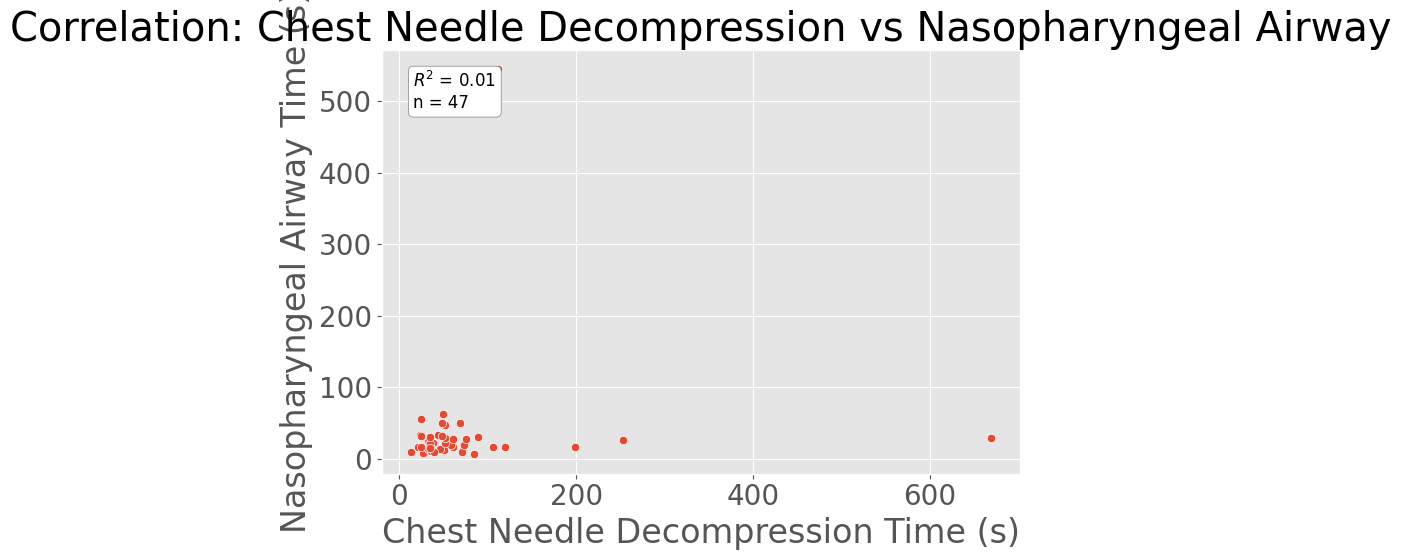


--- Analyzing: Chest Needle Decompression vs Extraglottic Airway ---
✅ Files with both tasks: 9


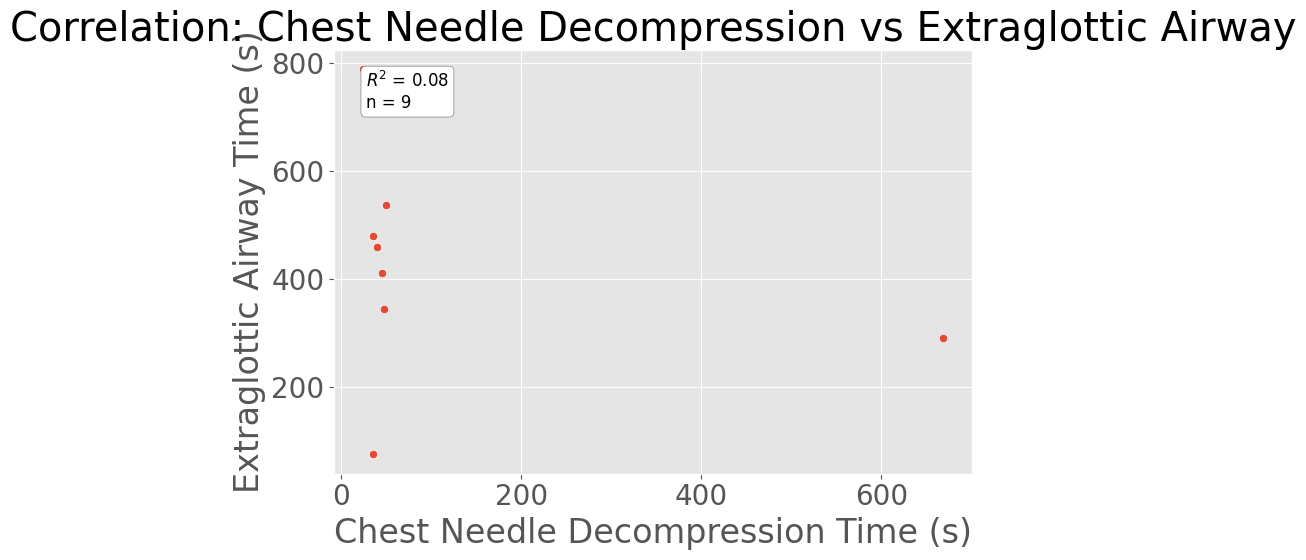


--- Analyzing: Chest Needle Decompression vs Surgical cricothyrotomy ---
⚠️ Skipping: No common files contain both 'Chest Needle Decompression' and 'Surgical cricothyrotomy'


--- Analyzing: Chest Needle Decompression vs Pressure Dressing Application ---
✅ Files with both tasks: 18


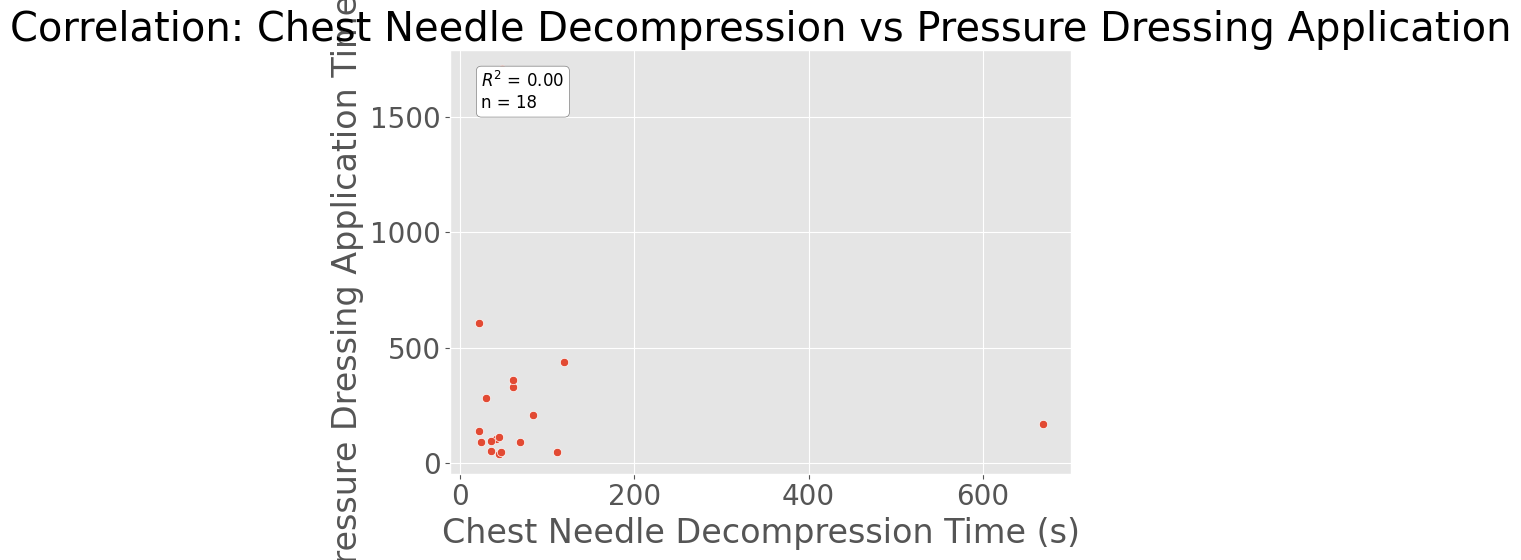


--- Analyzing: Chest Needle Decompression vs Tourniquet Application ---
✅ Files with both tasks: 42


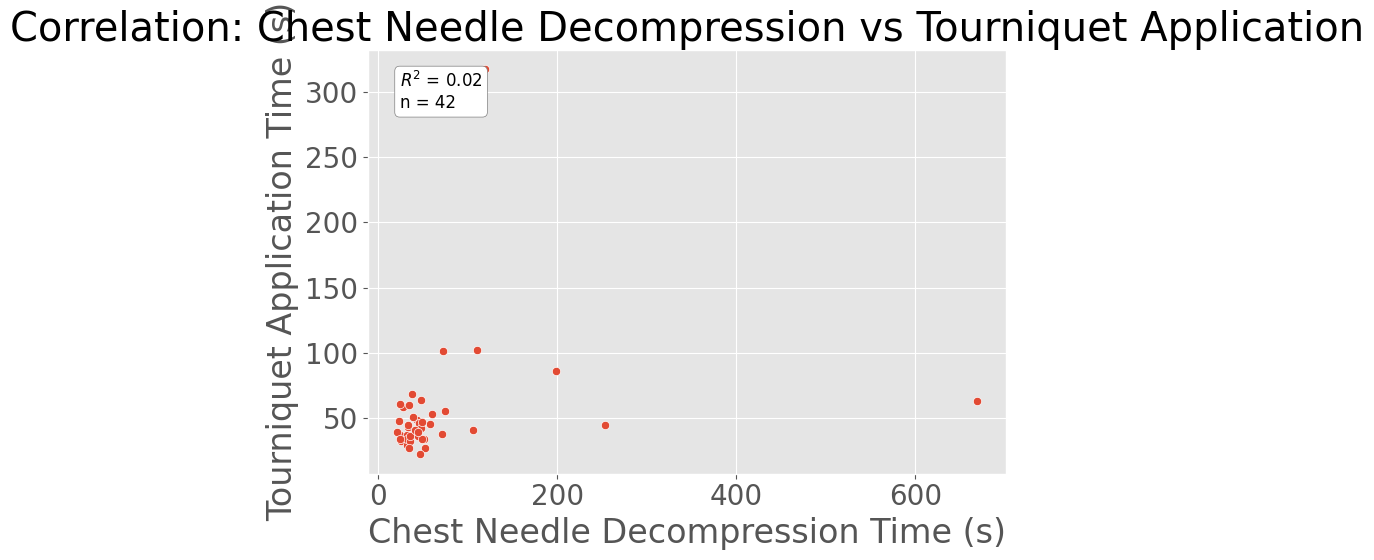


--- Analyzing: Chest Needle Decompression vs Junctional Wound Packing ---
✅ Files with both tasks: 24


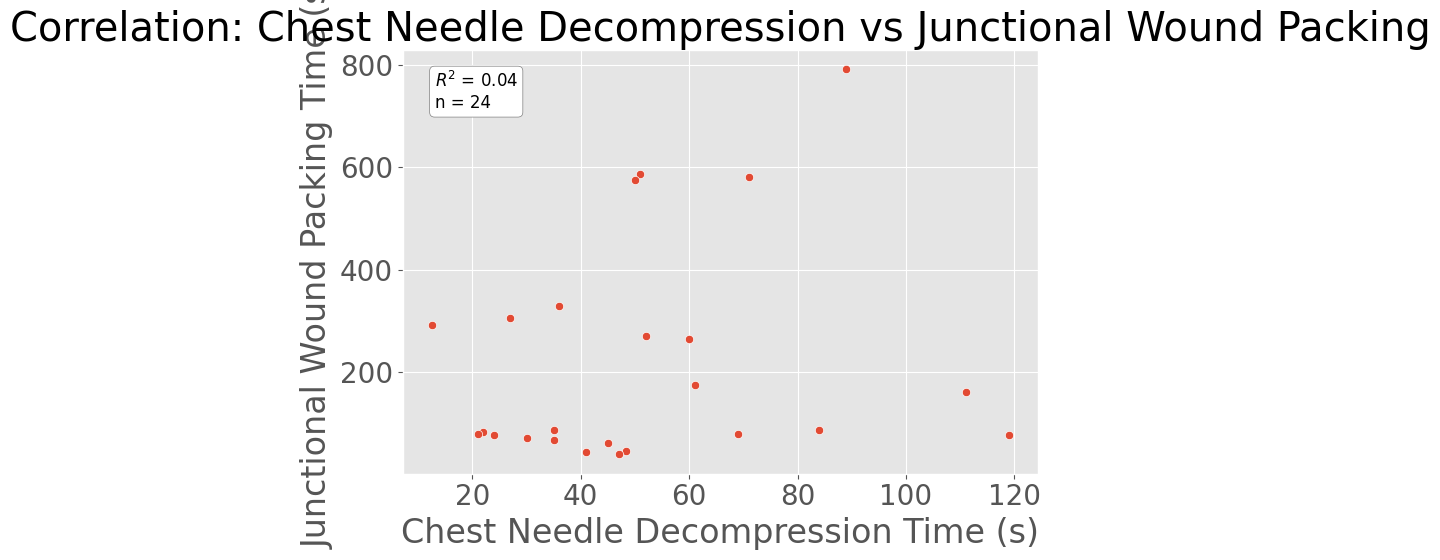


--- Analyzing: Chest Needle Decompression vs Chest Seal Application ---
✅ Files with both tasks: 47


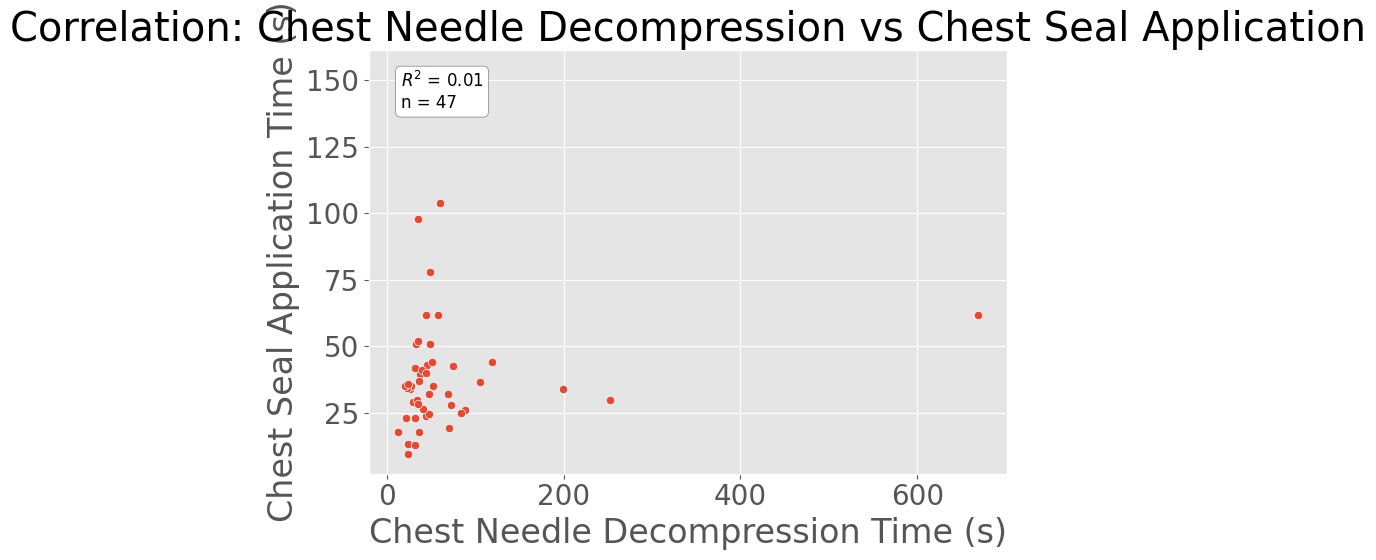

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
comparison_tasks = [
    'Nasopharyngeal Airway',
    'Extraglottic Airway',
    'Surgical cricothyrotomy',
    'Pressure Dressing Application',
    'Tourniquet Application',
    'Junctional Wound Packing',
    'Chest Seal Application',

]


for compare_task in comparison_tasks:
    print(f"\n--- Analyzing: Chest Needle Decompression vs {compare_task} ---")


    chest_nd_files = set(annotations_df[annotations_df['task'] == 'Chest Needle Decompression']['file_id'].unique())
    compare_task_files = set(annotations_df[annotations_df['task'] == compare_task]['file_id'].unique())
    common_files = list(chest_nd_files.intersection(compare_task_files))


    if len(common_files) == 0:
        print(f"⚠️ Skipping: No common files contain both 'Chest Needle Decompression' and '{compare_task}'\n")
        continue

    print(f"✅ Files with both tasks: {len(common_files)}")


    filtered_df = annotations_df[
        annotations_df['file_id'].isin(common_files) &
        annotations_df['task'].isin(['Chest Needle Decompression', compare_task])
    ].copy()


    grouped = filtered_df.groupby(['file_id', 'task'])['time_on_task_sec'].mean().unstack()


    grouped = grouped.rename(columns={
        'Chest Needle Decompression': 'Chest Needle Decompression Time',
        compare_task: f'{compare_task} Time'
    })

    grouped.dropna(inplace=True)


    if grouped.shape[0] < 2:
        print(f"⚠️ Not enough data to compute correlation for '{compare_task}'. Skipping plot.\n")
        continue


    x = grouped['Chest Needle Decompression Time']
    y = grouped[f'{compare_task} Time']
    corr_coef, _ = pearsonr(x, y)
    r_squared = corr_coef ** 2
    n = len(grouped)


    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y)
    plt.title(f'Correlation: Chest Needle Decompression vs {compare_task}')
    plt.xlabel('Chest Needle Decompression Time (s)')
    plt.ylabel(f'{compare_task} Time (s)')
    plt.grid(True)


    plt.text(
        0.05, 0.95,
        f'$R^2$ = {r_squared:.2f}\nn = {n}',
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')
    )

    plt.tight_layout()
    plt.show()


In [ ]:
# dataset_id = 'AutoDoc'
# simulation_table_id = 'Simulation Data'
# query_simulation = f"SELECT * FROM `sccm-discovery.{dataset_id}.{simulation_table_id}`"
# simulation_df = client.query(query_simulation).to_dataframe()
# simulation_df.shape

(1872, 84)

In [ ]:
simulation_df.columns

Index(['ad_id', 'redcap_repeat_instrument', 'redcap_repeat_instance',
       'sim_migrated', 'sim_migrated_name', 'sim_mascal', 'ad_starttime',
       'ad_endtime', 'ad_usecontext', 'ad_location', 'sim_outside', 'sim_dark',
       'sim_smoke', 'sim_sound', 'simulation_complete', 'sim_ascn_scenarioid',
       'associated_scenario_complete', 'person_id', 'sim_person_type',
       'sim_person_role', 'associated_participant_complete', 'device_id',
       'sim_device_personid', 'sim_device_type', 'associated_device_complete',
       'sim_doc_upload', 'sim_doc_desc', 'sim_doc_ra_type', 'sim_doc_type',
       'sim_doc_type_mascal', 'sim_doc_other', 'file_upload_complete',
       'sim_fileref_filename', 'sim_fileref_desc', 'sim_fileref_doctype',
       'sim_fileref_doctype_mascal', 'sim_fileref_other_doctype',
       'file_reference_complete', 'cns_sus_freq', 'cns_sus_freq_ans',
       'cns_sus_cmplx', 'cns_sus_cmplx_ans', 'cns_sus_easeofuse',
       'cns_sus_easeofuse_ans', 'cns_sus_technical

In [ ]:
print(simulation_df['person_id'].nunique())
print(simulation_df['ad_id'].nunique())
print(simulation_df['sim_mascal'].value_counts())
print(print(simulation_df['sim_migrated'].value_counts()))
print(print(simulation_df['sim_outside'].value_counts()))
print(print(simulation_df['sim_dark'].value_counts()))
print(print(simulation_df['sim_smoke'].value_counts()))
print(print(simulation_df['sim_sound'].value_counts()))
print(print(simulation_df['sim_person_type'].value_counts()))
print(print(simulation_df['sim_person_role'].value_counts()))
print(print(simulation_df['sim_dark'].value_counts()))

39
224
sim_mascal
0    159
Name: count, dtype: Int64
sim_migrated
1    221
0      2
Name: count, dtype: Int64
None
sim_outside
0    202
1     21
Name: count, dtype: Int64
None
sim_dark
0    212
1     11
Name: count, dtype: Int64
None
sim_smoke
0    220
1      3
Name: count, dtype: Int64
None
sim_sound
0    221
1      2
Name: count, dtype: Int64
None
sim_person_type
practitioner      143
related-person      1
Name: count, dtype: int64
None
sim_person_role
medic    143
cls        1
Name: count, dtype: int64
None
sim_dark
0    212
1     11
Name: count, dtype: Int64
None


**SIMULATIONS AND ANNOTATIONS MERGE**

To explore research questions

In [ ]:
#select columns from Simulations
static_columns = [
    'ad_id', 'person_id', 'sim_mascal', 'sim_migrated', 'sim_outside', 'sim_dark',
    'sim_smoke', 'sim_sound', 'sim_person_type', 'sim_person_role', 'sim_fileref_filename'
]

simulation_static_df = simulation_df[static_columns].drop_duplicates(subset='ad_id')

#
merged_df = annotations_df.merge(
    simulation_static_df,
    how='left',
    left_on='file_id',
    right_on='ad_id',
    suffixes=('', '_sim')
)

# 3. Drop the redundant 'ad_id' column (optional, since it's the same as file_id)
# if (merged_df['file_id'] == merged_df['ad_id']).all():
#     merged_df.drop(columns=['ad_id'], inplace=True)
#     print("✅ All file_id values matched ad_id. 'ad_id' column safely dropped.")
# else:
#     mismatched = merged_df[merged_df['file_id'] != merged_df['ad_id']]
#     print("⚠️ Warning: Some file_id values do not match ad_id. 'ad_id' not dropped.")
#     print(f"Mismatched rows: {len(mismatched)}")
#     display(mismatched.head())

# 4. Report summary
total_annotations = len(annotations_df)
unmapped_files = merged_df['ad_id'].isna().sum()
mapped_files = total_annotations - unmapped_files

print("✅ Merge Summary Report")
print("------------------------")
print(f"Total rows in annotations_df           : {total_annotations}")
print(f"Rows with a matching ad_id in sim_df   : {mapped_files}")
print(f"Rows with no match in simulation_df    : {unmapped_files}")
print(f"Total unique file_ids in annotations_df: {annotations_df['file_id'].nunique()}")
print(f"Total unique ad_ids in simulation_df   : {simulation_df['ad_id'].nunique()}")

# 5. Show distributions of static columns in merged dataset (excluding NaNs for clarity)
print("\n📊 Value Counts for Static Columns (merged):")
static_features = static_columns[1:]  # exclude 'ad_id'
for col in static_features:
    print(f"\nColumn: {col}")
    print(merged_df[col].value_counts(dropna=True))


✅ Merge Summary Report
------------------------
Total rows in annotations_df           : 813
Rows with a matching ad_id in sim_df   : 813
Rows with no match in simulation_df    : 0
Total unique file_ids in annotations_df: 76
Total unique ad_ids in simulation_df   : 224

📊 Value Counts for Static Columns (merged):

Column: person_id
Series([], Name: count, dtype: Int64)

Column: sim_mascal
sim_mascal
0    813
Name: count, dtype: Int64

Column: sim_migrated
sim_migrated
1    813
Name: count, dtype: Int64

Column: sim_outside
sim_outside
0    791
Name: count, dtype: Int64

Column: sim_dark
sim_dark
0    791
Name: count, dtype: Int64

Column: sim_smoke
sim_smoke
0    791
Name: count, dtype: Int64

Column: sim_sound
sim_sound
0    791
Name: count, dtype: Int64

Column: sim_person_type
Series([], Name: count, dtype: int64)

Column: sim_person_role
Series([], Name: count, dtype: int64)

Column: sim_fileref_filename
Series([], Name: count, dtype: int64)


In [ ]:
merged_df['sim_fileref_filename'].nunique()

0

**VIDEO PROCESSING**

Using a combination of heuristics and CLIP(openAI) as the foundation model

In [ ]:
# !pip install -q ultralytics opencv-python-headless mediapipe transformers torch torchvision pytorchvideo ffmpeg-python

In [ ]:
# import subprocess
# import numpy as np
# import pandas as pd
# import torch
# import cv2
# from pathlib import Path
# from ultralytics import YOLO
# import mediapipe as mp
# from transformers import CLIPProcessor, CLIPModel
# from pytorchvideo.models.hub import timesformer_base # Corrected import path
# from pytorchvideo.data.encoded_video import EncodedVideo

In [ ]:
# # Parameters
# GCS_PREFIX     = "gs://sccm--autodoc2025/migrated_video/"  # Prefix for all videos (must end with slash)
# CLIP_DURATION  = 60   # seconds to clip from each video
# FPS            = 2    # frames per second for extraction
# DRIVE_OUTPUT   = Path('/content/drive/MyDrive/SCMM2025vid')  # New folder in Drive
# DRIVE_OUTPUT.mkdir(parents=True, exist_ok=True)
# OUTPUT_CSV     = DRIVE_OUTPUT / "tourniquet_annotations.csv"
# FRAME_ROOT     = Path("/content/frames")
# FRAME_ROOT.mkdir(exist_ok=True)
# TMP_DIR          = Path('/content/tmp_clips')
# TMP_DIR.mkdir(exist_ok=True)

# # Authenticate and list videos in bucket
# from google.colab import auth
# auth.authenticate_user()

# # Get list of video URLs
# print("Listing videos in:", GCS_PREFIX)
# video_list = os.popen(f"gsutil ls {GCS_PREFIX}*.mp4").read().strip().split()
# print(f"Found {len(video_list)} videos.")

# # Load model once
# model = YOLO("yolov8n-pose.pt")

# all_detections = []
# # Process each video
# for video_url in video_list:
#     video_name = Path(video_url).stem
#     print(f"\n▶ Processing video: {video_name}")
#     raw_video = FRAME_ROOT / f"{video_name}.mp4"
#     clip_video = FRAME_ROOT / f"{video_name}_clip.mp4"
#     frame_dir = FRAME_ROOT / video_name
#     frame_dir.mkdir(exist_ok=True)

#     # Download
#     os.system(f"gsutil cp {video_url} {raw_video}")

#     # Clip first N seconds
#     os.system(f"ffmpeg -y -i {raw_video} -t {CLIP_DURATION} -c copy {clip_video}")

#     # Extract frames at specified FPS
#     os.system(f"ffmpeg -y -i {clip_video} -vf fps={FPS} {frame_dir}/frame_%04d.jpg")
#     frames = sorted(frame_dir.glob("*.jpg"))
#     print(f"Extracted {len(frames)} frames at {FPS} fps.")

#     # Detect tourniquet in frames
#     for frame_path in frames:
#         start = time.time()
#         res = model(str(frame_path), verbose=False)[0]
#         infer_time = time.time() - start
#         keypoints = []
#         # Check if keypoints were detected and the keypoint tensor is not empty
#         if res.keypoints is not None and res.keypoints.xy.shape[0] > 0:
#             keypoints = res.keypoints.xy[0].cpu().numpy().tolist()

#             detected = False
#             # Check if enough keypoints are detected for the tourniquet logic
#             if len(keypoints) >= 11: # Need keypoints 7, 8, 9, 10 for wrist and elbow
#                 # left wrist-elbow (9,7) and right wrist-elbow (10,8)
#                 lw, le = keypoints[9], keypoints[7]
#                 rw, re = keypoints[10], keypoints[8]
#                 d_left  = ((lw[0]-le[0])**2 + (lw[1]-le[1])**2)**0.5
#                 d_right = ((rw[0]-re[0])**2 + (rw[1]-re[1])**2)**0.5
#                 if d_left < 60 or d_right < 60:
#                     detected = True

#             if detected:
#                 frame_num = int(frame_path.stem.split("_")[1])
#                 timestamp = frame_num / FPS
#                 all_detections.append({
#                     "video": video_name,
#                     "frame": frame_path.name,
#                     "timestamp_sec": timestamp,
#                     "tourniquet_detected": True,
#                     "inference_time_s": round(infer_time, 4)
#                 })
#         else:
#             # Append detection with False if no keypoints or not enough for analysis
#             frame_num = int(frame_path.stem.split("_")[1])
#             timestamp = frame_num / FPS
#             all_detections.append({
#                 "video": video_name,
#                 "frame": frame_path.name,
#                 "timestamp_sec": timestamp,
#                 "tourniquet_detected": False,
#                 "inference_time_s": round(infer_time, 4)
#             })


#     # Optional: clean up raw & clip to save space
#     os.remove(raw_video)
#     os.remove(clip_video)

# # Save all detections to CSV
# df = pd.DataFrame(all_detections)
# df.to_csv(OUTPUT_CSV, index=False)
# print(f"\n✅ Completed. Total detections: {len(df)} saved to {OUTPUT_CSV}")

In [ ]:
# # 📒 Title: Tourniquet Detection & Benchmark with SlowFast, CLIP & Heuristics (Multiple Videos)

# # ✅ Install Dependencies
# # !pip install -q ultralytics opencv-python-headless mediapipe transformers torch torchvision pytorchvideo

# import os
# import time
# import cv2
# import numpy as np
# import pandas as pd
# from pathlib import Path
# from ultralytics import YOLO
# import mediapipe as mp
# import torch
# from transformers import CLIPProcessor, CLIPModel
# from pytorchvideo.models.hub import slowfast_r50
# from pytorchvideo.data.encoded_video import EncodedVideo
# from torchvision.transforms import Compose, Lambda, Normalize, RandomCrop
# from torch.nn.functional import softmax
# import subprocess

# # ✅ Mount Google Drive for output storage
# from google.colab import drive
# drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # ===== Parameters =====
# GCS_PREFIX       = "gs://sccm--autodoc2025/migrated_video/"
# CLIP_DURATION    = 60    # seconds to clip
# FPS              = 2     # fps for CLIP and heuristics
# PROXIMITY_THRESH = 60    # pixels
# CLIP_THRESHOLD   = 0.3   # similarity
# TS_THRESHOLD     = 0.5   # confidence for TimeSformer
# WINDOW_TS        = 16    # frames for TimeSformer
# BATCH_SIZE       = 16    # for CLIP batching
# WINDOW_AGG       = 5     # consecutive frames
# OUTPUT_DIR       = Path('/content/drive/MyDrive/SCMM2025vid')
# OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
# OUTPUT_CSV       = OUTPUT_DIR / "tourniquet_video_flags_all.csv"
# FRAME_ROOT       = Path('/content/frames')
# FRAME_ROOT.mkdir(exist_ok=True)
# TMP_DIR          = Path('/content/tmp_clips')
# TMP_DIR.mkdir(exist_ok=True)
# SF_NUM_FRAMES     = 8     # number of frames to sample for SlowFast

# # def authenticate_and_list():
# from google.colab import auth
# auth.authenticate_user()
# video_list = os.popen(f"gsutil ls {GCS_PREFIX}*.mp4").read().strip().split()
# print(f"Found {len(video_list)} videos. Processing first 40.")
# video_list = video_list[:10]
#     # print(f"Listing videos in: {GCS_PREFIX}")
#     # vids = os.popen(f"gsutil ls {GCS_PREFIX}*.mp4").read().strip().split()
#     # print(f"Found {len(vids)} videos to process.")
#     # return vids

Found 148 videos. Processing first 40.


In [ ]:

# # ===== Load Models =====n# YOLOv8-Pose
# model_yolov8 = YOLO('yolov8n-pose.pt')
# # YOLOX-Nano simulated with YOLOv8n
# model_yolox  = YOLO('yolov8n.pt')
# # MediaPipe Pose
# mp_pose      = mp.solutions.pose
# mp_model     = mp_pose.Pose(static_image_mode=True)
# # CLIP
# device       = 'cuda' if torch.cuda.is_available() else 'cpu'
# clip_processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
# clip_model     = CLIPModel.from_pretrained('openai/clip-vit-base-patch32').to(device)
# txt = clip_processor(text=["a person applying a tourniquet"], return_tensors='pt', padding=True)
# text_inputs = {k: v.to(device) for k, v in txt.items()}
# text_features = clip_model.get_text_features(**text_inputs)
# text_features = text_features / text_features.norm(p=2, dim=-1, keepdim=True)
# # SlowFast
# sf_model = slowfast_r50(pretrained=True).to(device).eval()
# # sf_transforms = Compose([
# #     Lambda(lambda x: x / 255.0),
# #     Normalize((0.45,0.45,0.45), (0.225,0.225,0.225)),
# #     RandomCrop((224,224))])
# sf_norm = Normalize((0.45, 0.45, 0.45), (0.225,0.225,0.225))



In [ ]:
# records = []
# for url in video_list:
#     name      = Path(url).stem
#     frame_dir = FRAME_ROOT / name
#     frame_dir.mkdir(exist_ok=True)

#     # Stream and extract frames
#     subprocess.run([
#         "bash","-c",
#         f"gsutil cat {url} | ffmpeg -i - -t {CLIP_DURATION} -vf fps={FPS} {frame_dir}/frame_%04d.jpg"], check=True)
#     frames = sorted(frame_dir.glob('*.jpg'))
#     print(f"\n▶ {name}: extracted {len(frames)} frames.")

#     # Batch CLIP
#     sims = []
#     for i in range(0, len(frames), BATCH_SIZE):
#         batch = frames[i:i+BATCH_SIZE]
#         pil_imgs = [cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB) for f in batch]
#         inputs   = clip_processor(images=pil_imgs, return_tensors='pt', padding=True).to(device)
#         feats    = clip_model.get_image_features(**inputs)
#         feats    = feats / feats.norm(p=2, dim=-1, keepdim=True)
#         sims += (text_features @ feats.T).squeeze(0).cpu().tolist()

#     # Per-frame processing
#     for i, frame_path in enumerate(frames):
#         ts        = i / FPS
#         sim       = sims[i]
#         clip_flag = sim > CLIP_THRESHOLD

#         # YOLOv8-Pose
#         t0 = time.time(); res1 = model_yolov8(str(frame_path), verbose=False)[0]; t1 = time.time()-t0
#         k1 = res1.keypoints.xy[0].cpu().numpy().tolist() if res1.keypoints and res1.keypoints.xy.shape[0] else []
#         b1 = res1.boxes.xyxy.cpu().numpy().tolist() if hasattr(res1, 'boxes') else []

#         # YOLOX-Nano
#         t0 = time.time(); res2 = model_yolox(str(frame_path), verbose=False)[0]; t2 = time.time()-t0
#         b2 = res2.boxes.xyxy.cpu().numpy().tolist() if hasattr(res2, 'boxes') else []

#         # MediaPipe
#         img_bgr = cv2.imread(str(frame_path)); img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#         t0 = time.time(); mp_res = mp_model.process(img_rgb); t3 = time.time()-t0
#         k3 = [(lm.x*img_rgb.shape[1], lm.y*img_rgb.shape[0]) for lm in mp_res.pose_landmarks.landmark] if mp_res.pose_landmarks else []

#         # Heuristics for each model
#         def compute_heur(points):
#             if len(points) < 15: return False, np.nan
#             pts = {'lw':points[9],'le':points[7],'rw':points[10],'re':points[8],'lh':points[11],'lk':points[13],'rh':points[12],'rk':points[14]}
#             dists = [np.hypot(pts[p][0]-pts[q][0], pts[p][1]-pts[q][1]) for p,q in [('lw','le'),('rw','re'),('lh','lk'),('rh','rk')]]
#             if not any(d < PROXIMITY_THRESH for d in dists): return False, np.nan
#             xs = [v[0] for v in pts.values()]; ys = [v[1] for v in pts.values()]
#             x1, x2 = max(int(min(xs)-20),0), min(int(max(xs)+20), img_rgb.shape[1])
#             y1, y2 = max(int(min(ys)-20),0), min(int(max(ys)+20), img_rgb.shape[0])
#             region = img_bgr[y1:y2, x1:x2]; mask = (region[:,:,2]>region[:,:,1]*1.2)&(region[:,:,2]>region[:,:,0]*1.2)
#             return True, mask.sum()/mask.size if mask.size else np.nan

#         heur_y8, red_y8 = compute_heur(k1)
#         heur_yx, red_yx = False, np.nan
#         heur_mp, red_mp = compute_heur(k3)

#         # Append a single consolidated record
#         records.append({
#             'video': name,
#             'frame': frame_path.name,
#             'timestamp_sec': ts,
#             'clip_sim': round(sim,3), 'clip_flag': clip_flag,
#             'y8_time': round(t1,3), 'y8_kpts': len(k1), 'y8_boxes': len(b1), 'heur_y8': heur_y8, 'red_y8': round(red_y8,3),
#             'yx_time': round(t2,3), 'yx_boxes': len(b2), 'heur_yx': heur_yx, 'red_yx': round(red_yx,3),
#             'mp_time': round(t3,3), 'mp_kpts': len(k3), 'heur_mp': heur_mp, 'red_mp': round(red_mp,3)
#         })

#     # Cleanup
#     for f in frame_dir.glob('*.jpg'): f.unlink()
#     frame_dir.rmdir()


▶ 012aec06-c94c-4d6d-a633-37b8e8d98ab0: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 01ff800f-bc7c-4ed7-9635-d91822db19b5: extracted 57 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 04624bf9-30cb-4deb-9738-393f66206580: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 04e1e674-1302-4bf4-8d1c-be6091edc3f6: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 04f427d0-08a9-4ef7-8304-f8e3964c168a: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 07aaf6f6-ce06-4aad-b757-0588addbab8f: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 0b80442e-fafe-4724-a170-f13b03b1a80f: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 0cd03e9a-8198-4a97-abb4-0b000948d71d: extracted 99 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 0ea38263-f6ad-4f6a-8152-027572e1c77c: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 0eb95908-f038-4ac2-bcee-1ab7b4ab4068: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
# # Save to Drive
# pd.DataFrame(records).to_csv(OUTPUT_CSV, index=False)
# print(f"\n✅ Done. Saved {len(records)} entries to {OUTPUT_CSV}")



✅ Done. Saved 1116 entries to /content/drive/MyDrive/SCMM2025vid/tourniquet_benchmark.csv


In [ ]:
# CLIP_PROMPTS = [
#     "A tourniquet is a device used to control bleeding. Look at the image and let me know if it seems like the person is applying a tourniquet. Generally there will be evidence of blood around, and it would be on the limbs - either the upper or lower",
#     "a person applying a tourniquet",
#     "a close-up of a bleeding limb with a tourniquet applied",
#     "a medical simulation where a person is applying a tourniquet to a thigh",
#     "application of a tourniquet to control hemorrhage",
#     "a red band around a bleeding leg"
# ]
# clip_processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
# clip_model     = CLIPModel.from_pretrained('openai/clip-vit-base-patch32').to(device)

# # Compute CLIP multi-prompt similarities

# def compute_clip_multi_prompt(frames, batch_size=BATCH_SIZE):
#     all_sims = []
#     for prompt in CLIP_PROMPTS:
#         txt = clip_processor(text=[prompt], return_tensors='pt', padding=True)
#         text_inputs = {k: v.to(device) for k,v in txt.items()}
#         text_features = clip_model.get_text_features(**text_inputs)
#         text_features = text_features / text_features.norm(p=2, dim=-1, keepdim=True)
#         sims = []
#         for i in range(0, len(frames), batch_size):
#             batch = frames[i:i+batch_size]
#             pil_imgs = [cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB) for f in batch]
#             inputs = clip_processor(images=pil_imgs, return_tensors='pt', padding=True).to(device)
#             feats = clip_model.get_image_features(**inputs)
#             feats = feats / feats.norm(p=2, dim=-1, keepdim=True)
#             sims += (text_features @ feats.T).squeeze(0).cpu().tolist()
#         all_sims.append(sims)
#     return np.mean(np.array(all_sims), axis=0).tolist()

# # Smooth: require 5 consecutive true

# def consecutive_flag(arr, window=5):
#     arr = np.array(arr, dtype=int)
#     flagged = np.convolve(arr, np.ones(window, dtype=int), mode='valid') == window
#     out = np.zeros_like(arr, dtype=bool)
#     for idx, val in enumerate(flagged):
#         if val:
#             out[idx:idx+window] = True
#     return out.tolist()

# # ===== Pipeline =====
# records = []
# for url in video_list:
#     name      = Path(url).stem
#     frame_dir = FRAME_ROOT / name
#     frame_dir.mkdir(exist_ok=True)

#     # Stream and extract frames
#     subprocess.run([
#         "bash", "-c",
#         f"gsutil cat {url} | ffmpeg -i - -t {CLIP_DURATION} -vf fps={FPS} {frame_dir}/frame_%04d.jpg"
#     ], check=True)
#     frames = sorted(frame_dir.glob('*.jpg'))
#     print(f"\n▶ {name}: extracted {len(frames)} frames.")

#     # 1) Multi-prompt CLIP sims & raw flags
#     clip_sims = compute_clip_multi_prompt(frames)
#     clip_flags = [s > CLIP_THRESHOLD for s in clip_sims]

#     # 2) Per-frame model & heuristics
#     raw = []
#     for i, frame_path in enumerate(frames):
#         ts = i / FPS
#         sim = clip_sims[i]
#         # YOLOv8-Pose
#         t0 = time.time(); r1 = model_yolov8(str(frame_path), verbose=False)[0]; t_y8 = time.time()-t0
#         k1 = r1.keypoints.xy[0].cpu().numpy().tolist() if r1.keypoints and r1.keypoints.xy.shape[0] else []
#         b1 = r1.boxes.xyxy.cpu().numpy().tolist() if hasattr(r1,'boxes') else []
#         # YOLOX
#         t0 = time.time(); r2 = model_yolox(str(frame_path), verbose=False)[0]; t_yx = time.time()-t0
#         b2 = r2.boxes.xyxy.cpu().numpy().tolist() if hasattr(r2,'boxes') else []
#         # MediaPipe
#         img = cv2.imread(str(frame_path)); rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         t0 = time.time(); mp_res = mp_model.process(rgb); t_mp = time.time()-t0
#         k3 = [(lm.x*rgb.shape[1], lm.y*rgb.shape[0]) for lm in mp_res.pose_landmarks.landmark] if mp_res.pose_landmarks else []

#         def compute_heur(pts):
#             if len(pts) < 15: return False, np.nan
#             D = []
#             pairs = [('lw','le'),('rw','re'),('lh','lk'),('rh','rk')]
#             idxs = {'lw':9,'le':7,'rw':10,'re':8,'lh':11,'lk':13,'rh':12,'rk':14}
#             for p,q in pairs:
#                 x1,y1 = pts[idxs[p]]; x2,y2 = pts[idxs[q]]
#                 D.append(np.hypot(x1-x2,y1-y2))
#             if not any(d < PROXIMITY_THRESH for d in D): return False, np.nan
#             xs = [pts[i][0] for i in idxs.values()]; ys = [pts[i][1] for i in idxs.values()]
#             x1_,x2_ = max(int(min(xs)-20),0),min(int(max(xs)+20),rgb.shape[1])
#             y1_,y2_ = max(int(min(ys)-20),0),min(int(max(ys)+20),rgb.shape[0])
#             region = img[y1_:y2_,x1_:x2_]; mask = (region[:,:,2]>region[:,:,1]*1.2)&(region[:,:,2]>region[:,:,0]*1.2)
#             return True, mask.sum()/mask.size if mask.size else np.nan

#         heur_y8, ry8 = compute_heur(k1)
#         heur_yx, ryx = False, np.nan
#         heur_mp, rmp = compute_heur(k3)

#         raw.append({
#             'video':name,'frame':frame_path.name,'timestamp_sec':ts,
#             'clip_sim':round(sim,3),'clip_flag':clip_flags[i],
#             'yolov8_time':round(t_y8,3),'yolov8_kpts':len(k1),'yolov8_boxes':len(b1),'heur_y8':heur_y8,'red_y8':round(ry8,3),
#             'yolox_time':round(t_yx,3),'yolox_boxes':len(b2),'heur_yx':heur_yx,'red_yx':round(ryx,3),
#             'mp_time':round(t_mp,3),'mp_kpts':len(k3),'heur_mp':heur_mp,'red_mp':round(rmp,3)
#         })

#     # 3) Aggregate over 5 consecutive frames
#     agg_clip = consecutive_flag([r['clip_flag'] for r in raw],5)
#     agg_y8   = consecutive_flag([r['heur_y8'] for r in raw],5)
#     agg_mp   = consecutive_flag([r['heur_mp'] for r in raw],5)

#     for r,c8,y8,mpf in zip(raw,agg_clip,agg_y8,agg_mp):
#         r['clip_flag_agg5'] = c8
#         r['heur_y8_agg5']   = y8
#         r['heur_mp_agg5']   = mpf
#         records.append(r)

#     # Cleanup
#     for f in frame_dir.glob('*.jpg'): f.unlink()
#     frame_dir.rmdir()

# # Save to Drive
# pd.DataFrame(records).to_csv(OUTPUT_CSV,index=False)
# print(f"\n✅ Completed. Saved {len(records)} records to {OUTPUT_CSV}")


▶ 012aec06-c94c-4d6d-a633-37b8e8d98ab0: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 01ff800f-bc7c-4ed7-9635-d91822db19b5: extracted 57 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 04624bf9-30cb-4deb-9738-393f66206580: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 04e1e674-1302-4bf4-8d1c-be6091edc3f6: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 04f427d0-08a9-4ef7-8304-f8e3964c168a: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 07aaf6f6-ce06-4aad-b757-0588addbab8f: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 0b80442e-fafe-4724-a170-f13b03b1a80f: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 0cd03e9a-8198-4a97-abb4-0b000948d71d: extracted 99 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 0ea38263-f6ad-4f6a-8152-027572e1c77c: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



▶ 0eb95908-f038-4ac2-bcee-1ab7b4ab4068: extracted 120 frames.


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



✅ Completed. Saved 1116 records to /content/drive/MyDrive/SCMM2025vid/tourniquet_benchmark.csv


In [ ]:
# WINDOW           = 5     # frames for consecutive aggregation
# # ===== Multi-Prompt CLIP =====n
# PROMPTS = [
#     "A tourniquet is a device used to control bleeding. Look at the image and let me know if it seems like the person is applying a tourniquet. Generally there will be evidence of blood around, and it would be on the limbs - either the upper or lower",
#     "a person applying a tourniquet",
#     "a close-up of a bleeding limb with a tourniquet applied",
#     "a medical simulation where a person is applying a tourniquet to a thigh",
#     "application of a tourniquet to control hemorrhage",
#     "a red band around a bleeding leg"
# ]
# clip_processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
# clip_model     = CLIPModel.from_pretrained('openai/clip-vit-base-patch32').to(device)

# def compute_clip(frames):
#     all_sims = []
#     for p in PROMPTS:
#         txt = clip_processor(text=[p], return_tensors='pt', padding=True)
#         ti  = {k: v.to(device) for k,v in txt.items()}
#         tf  = clip_model.get_text_features(**ti)
#         tf  = tf / tf.norm(p=2, dim=-1, keepdim=True)
#         sims = []
#         for i in range(0, len(frames), BATCH_SIZE):
#             batch = frames[i:i+BATCH_SIZE]
#             imgs  = [cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB) for f in batch]
#             inp   = clip_processor(images=imgs, return_tensors='pt', padding=True).to(device)
#             feats = clip_model.get_image_features(**inp)
#             feats = feats / feats.norm(p=2, dim=-1, keepdim=True)
#             sims += (tf @ feats.T).squeeze(0).cpu().tolist()
#         all_sims.append(sims)
#     return np.mean(all_sims, axis=0)

# # Consecutive flag

# def consecutive_flag(arr, w=WINDOW):
#     a = np.array(arr,dtype=int)
#     c = np.convolve(a, np.ones(w,dtype=int), mode='valid') == w
#     out = np.zeros_like(a, dtype=bool)
#     for i, v in enumerate(c):
#         if v: out[i:i+w] = True
#     return out.tolist()

# # ===== Video-Level Pipeline =====n
# video_flags = []
# for url in video_list:
#     name      = Path(url).stem
#     frame_dir = FRAME_ROOT / name
#     frame_dir.mkdir(exist_ok=True)

#     # Stream-extract frames
#     subprocess.run(["bash","-c",f"gsutil cat {url} | ffmpeg -i - -t {CLIP_DURATION} -vf fps={FPS} {frame_dir}/frame_%04d.jpg"], check=True)
#     frames = sorted(frame_dir.glob('*.jpg'))

#     # CLIP
#     sims       = compute_clip(frames)
#     clip_f     = [s>CLIP_THRESHOLD for s in sims]
#     agg_clip   = consecutive_flag(clip_f)
#     flag_clip  = any(agg_clip)

#     # YOLOv8 Pose heuristic
#     heur_y8_list = []
#     for f in frames:
#         r = model_yolov8(str(f), verbose=False)[0]
#         k = r.keypoints.xy[0].cpu().numpy() if r.keypoints and r.keypoints.xy.shape[0] else None
#         if k is not None:
#             pts = { 'lw':k[9], 'le':k[7], 'rw':k[10], 're':k[8], 'lh':k[11], 'lk':k[13], 'rh':k[12], 'rk':k[14] }
#             ds = [np.hypot(pts[p][0]-pts[q][0], pts[p][1]-pts[q][1]) for p,q in [('lw','le'),('rw','re'),('lh','lk'),('rh','rk')]]
#             heur_y8_list.append(any(d<PROXIMITY_THRESH for d in ds))
#         else:
#             heur_y8_list.append(False)
#     agg_y8    = consecutive_flag(heur_y8_list)
#     flag_y8   = any(agg_y8)

#     # MediaPipe heuristic
#     heur_mp_list = []
#     for f in frames:
#         img = cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB)
#         m = mp_model.process(img)
#         if m.pose_landmarks:
#             lm = m.pose_landmarks.landmark
#             pts = { 'lw':(lm[9].x*img.shape[1], lm[9].y*img.shape[0]), 'le':(lm[7].x*img.shape[1], lm[7].y*img.shape[0]),
#                     'rw':(lm[10].x*img.shape[1], lm[10].y*img.shape[0]), 're':(lm[8].x*img.shape[1], lm[8].y*img.shape[0]),
#                     'lh':(lm[11].x*img.shape[1], lm[11].y*img.shape[0]), 'lk':(lm[13].x*img.shape[1], lm[13].y*img.shape[0]),
#                     'rh':(lm[12].x*img.shape[1], lm[12].y*img.shape[0]), 'rk':(lm[14].x*img.shape[1], lm[14].y*img.shape[0]) }
#             ds = [np.hypot(pts[p][0]-pts[q][0], pts[p][1]-pts[q][1]) for p,q in [('lw','le'),('rw','re'),('lh','lk'),('rh','rk')]]
#             heur_mp_list.append(any(d<PROXIMITY_THRESH for d in ds))
#         else:
#             heur_mp_list.append(False)
#     agg_mp    = consecutive_flag(heur_mp_list)
#     flag_mp   = any(agg_mp)

#     # Collect video-level flags
#     video_flags.append({
#         'video': name,
#         'clip_flag': flag_clip,
#         'yolov8_flag': flag_y8,
#         'mp_flag': flag_mp,
#         'clip_conf_mean': float(np.mean(sims))
#     })

#     # Cleanup
#     for f in frame_dir.glob('*.jpg'): f.unlink()
#     frame_dir.rmdir()

# # Save video-level flags
# pd.DataFrame(video_flags).to_csv(OUTPUT_CSV, index=False)
# print(f"\n✅ Completed. Saved video-level flags to {OUTPUT_CSV}")


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.11/dist-packages/google/protobuf/sy


✅ Completed. Saved video-level flags to /content/drive/MyDrive/SCMM2025vid/tourniquet_benchmark.csv


In [ ]:
# import subprocess
# videos = subprocess.check_output([
#     'gsutil','ls', f"{GCS_PREFIX}*.mp4"
# ]).decode().split()[:10]
# print(f"Processing {len(videos)} videos...")

# model_y8 = YOLO('yolov8n-pose.pt')
# # YOLOX (boxes only)
# model_yx = YOLO('yolov8n.pt')
# # MediaPipe Pose
# mp_model = mp.solutions.pose.Pose(static_image_mode=True)
# # CLIP multi-prompt
# CLIP_PROMPTS = [
#     "A tourniquet is a device used to control bleeding. Look at the image and let me know if it seems like the person is applying a tourniquet. Generally there will be evidence of blood around, and it would be on the limbs - either the upper or lower",
#     "a person applying a tourniquet",
#     "a close-up of a bleeding limb with a tourniquet applied",
#     "a medical simulation where a person is applying a tourniquet to a thigh",
#     "application of a tourniquet to control hemorrhage",
#     "a red band around a bleeding leg"
# ]

# clip_proc = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
# clip_mod  = CLIPModel.from_pretrained('openai/clip-vit-base-patch32').to(device)

# def compute_clip_sims(frames):
#     sims_all = []
#     for prompt in CLIP_PROMPTS:
#         txt = clip_proc(text=[prompt], return_tensors='pt', padding=True)
#         txt = {k: v.to(device) for k, v in txt.items()}
#         text_feat = clip_mod.get_text_features(**txt)
#         text_feat = text_feat / text_feat.norm(p=2, dim=-1, keepdim=True)
#         sims = []
#         for i in range(0, len(frames), BATCH_SIZE):
#             batch = frames[i:i+BATCH_SIZE]
#             imgs  = [cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB) for f in batch]
#             inp   = clip_proc(images=imgs, return_tensors='pt', padding=True).to(device)
#             feats = clip_mod.get_image_features(**inp)
#             feats = feats / feats.norm(p=2, dim=-1, keepdim=True)
#             sims += (text_feat @ feats.T).squeeze(0).cpu().tolist()
#         sims_all.append(sims)
#     return np.mean(sims_all, axis=0)


# def agg_flag(arr):
#     a = np.array(arr, dtype=int)
#     c = np.convolve(a, np.ones(WINDOW_AGG, dtype=int), mode='valid') == WINDOW_AGG
#     out = np.zeros_like(a, dtype=bool)
#     for idx, val in enumerate(c):
#         if val:
#             out[idx:idx+WINDOW_AGG] = True
#     return out.any()

# # ===== Main Processing Loop =====n
# records = []
# for url in videos:
#     vid = Path(url).stem
#     print(f"▶ Processing {vid}")

#     # Create frame dir
#     frame_dir = FRAME_ROOT / vid
#     frame_dir.mkdir(exist_ok=True)

#     # 1. Download short clip for TimeSformer
#     tmp_clip = TMP_DIR / f"{vid}.mp4"
#     subprocess.run([
#         'gsutil', 'cp', url, str(tmp_clip)
#     ], check=True)

#     # 2. Extract frames for CLIP and heuristics
#     subprocess.run([
#         'ffmpeg', '-y', '-i', str(tmp_clip),
#         '-t', str(CLIP_DURATION),
#         '-vf', f'fps={FPS}',
#         str(frame_dir / 'frame_%04d.jpg')
#     ], check=True)

#     frames = sorted(frame_dir.glob('*.jpg'))

#     # ---- CLIP ----
#     clip_sims = compute_clip_sims(frames)
#     flag_clip = agg_flag(clip_sims > CLIP_THRESHOLD)

#     # ---- YOLOv8 Pose Heuristic ----
#     heur_y8 = []
#     for f in frames:
#         res = model_y8(str(f), verbose=False)[0]
#         kpts = res.keypoints.xy[0].cpu().numpy() if res.keypoints and res.keypoints.xy.shape[0] else None
#         if kpts is None:
#             heur_y8.append(False)
#         else:
#             pts = { 'lw':kpts[9], 'le':kpts[7], 'rw':kpts[10], 're':kpts[8], 'lh':kpts[11], 'lk':kpts[13], 'rh':kpts[12], 'rk':kpts[14] }
#             dists = [np.hypot(pts[p][0]-pts[q][0], pts[p][1]-pts[q][1]) for p,q in [('lw','le'),('rw','re'),('lh','lk'),('rh','rk')]]
#             heur_y8.append(any(d < PROXIMITY_THRESH for d in dists))
#     flag_y8 = agg_flag(heur_y8)

#     # ---- MediaPipe Pose Heuristic ----
#     heur_mp = []
#     for f in frames:
#         img = cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB)
#         mp_res = mp_model.process(img)
#         if not mp_res.pose_landmarks:
#             heur_mp.append(False)
#         else:
#             lm = mp_res.pose_landmarks.landmark
#             coords = [(lm[i].x*img.shape[1], lm[i].y*img.shape[0]) for i in [9,7,10,8,11,13,12,14]]
#             dists = [np.hypot(coords[idx][0]-coords[idx+1][0], coords[idx][1]-coords[idx+1][1]) for idx in range(0,8,2)]
#             heur_mp.append(any(d < PROXIMITY_THRESH for d in dists))
#     flag_mp = agg_flag(heur_mp)

#     # ---- TimeSformer Zero-Shot ----
#     enc = EncodedVideo.from_path(str(tmp_clip))
#     video_data = enc.get_clip(0, CLIP_DURATION)['video']  # [T,H,W,C]
#     T = video_data.shape[0]
#     idxs = np.linspace(0, T-1, WINDOW_TS, dtype=int)
#     # Batch the TimeSformer inference in chunks of 8 frames
#     batch_ts = 8
#     ts_confs = []
#     for i_start in range(0, len(idxs), batch_ts):
#         sub_idxs = idxs[i_start:i_start+batch_ts]
#         samples = []
#         for j in sub_idxs:
#             img = video_data[j]
#             tensor = torch.from_numpy(img).permute(2,0,1).float() / 255.0
#             samples.append(ts_transform(tensor))
#         clip_tensor = torch.stack(samples, dim=1).unsqueeze(0).to(device)  # [1,3,sub_T,H,W]
#         with torch.no_grad():
#             logits = ts_model(clip_tensor)
#             probs = torch.softmax(logits, dim=1)
#             ts_confs.append(float(probs.max()))
#     # Aggregate TimeSformer confidences
#     ts_conf = float(np.mean(ts_confs))
#     flag_ts = ts_conf > TS_THRESHOLD

#     # Cleanup
#     tmp_clip.unlink(missing_ok=True)
#     for f in frame_dir.glob('*.jpg'): f.unlink()
#     frame_dir.rmdir()

#     # Record one flag per model per video
#     records.append({
#         'video': vid,
#         'clip_flag': bool(flag_clip),
#         'yolov8_flag': bool(flag_y8),
#         'mp_flag': bool(flag_mp),
#         'ts_flag': bool(flag_ts),
#         'clip_conf_mean': float(np.mean(clip_sims)),
#         'ts_conf': ts_conf
#     })

# # ===== Save Results =====np_df = pd.DataFrame(records)
# np_df.to_csv(OUTPUT_CSV, index=False)
# print(f"\n✅ Completed. Saved flags to {OUTPUT_CSV}")


In [ ]:
# # 📒 Title: Video Annotation Benchmark (CLI P, YOLOv8-Pose & MediaPipe, per-Video Flags, 10 Videos)

# # ✅ Install Dependencies

# !pip install -q ultralytics opencv-python-headless mediapipe transformers torch torchvision ffmpeg-python

# import subprocess
# import numpy as np
# import pandas as pd
# import torch
# import cv2
# from pathlib import Path
# from ultralytics import YOLO
# import mediapipe as mp
# from transformers import CLIPProcessor, CLIPModel

# # ✅ Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # ===== Parameters =====
# GCS_PREFIX    = "gs://sccm--autodoc2025/migrated_video/"
# CLIP_DURATION = 60        # seconds to process
# FPS           = 2         # for frame extraction
# BATCH_CLIP    = 16        # CLIP batch size
# WINDOW_AGG    = 5         # consecutive-frame threshold
# LIMIT         = 10        # number of videos to run

# OUTPUT_DIR = Path('/content/drive/MyDrive/SCMM2025vid')
# OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
# OUTPUT_CSV = OUTPUT_DIR / "tourniquet_flags.csv"
# TMP_DIR    = Path('/content/tmp')
# TMP_DIR.mkdir(exist_ok=True)
# FRAMES_DIR = Path('/content/frames')
# FRAMES_DIR.mkdir(exist_ok=True)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # ===== List Videos =====
# from google.colab import auth
# auth.authenticate_user()
# urls = (subprocess.check_output(
#     ['gsutil','ls', f"{GCS_PREFIX}*.mp4"]
#   ).decode().split())[:LIMIT]
# print(f"Running on {len(urls)} videos.")

# # ===== Load Models =====
# # CLIP (multi-prompt)
# CLIP_PROMPTS = [
#   "A tourniquet is a device used to control bleeding. Generally there will be evidence of blood around, on limbs.",
#   "a person applying a tourniquet",
#   "application of a tourniquet to control hemorrhage"
# ]
# clip_proc = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
# clip_mod  = CLIPModel.from_pretrained('openai/clip-vit-base-patch32').to(device)

# # YOLOv8-Pose
# model_y8 = YOLO('yolov8n-pose.pt')
# # MediaPipe Pose
# mp_pose = mp.solutions.pose.Pose(static_image_mode=True)

# # ===== Helpers =====
# def compute_clip_sims(frames):
#     sims_all = []
#     for prompt in CLIP_PROMPTS:
#         txt = clip_proc(text=[prompt], return_tensors='pt', padding=True).to(device)
#         text_feat = clip_mod.get_text_features(**txt)
#         text_feat = text_feat / text_feat.norm(p=2, dim=-1, keepdim=True)
#         sims = []
#         for i in range(0, len(frames), BATCH_CLIP):
#             batch = frames[i:i+BATCH_CLIP]
#             imgs = [cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB) for f in batch]
#             inp  = clip_proc(images=imgs, return_tensors='pt', padding=True).to(device)
#             img_feat = clip_mod.get_image_features(**inp)
#             img_feat = img_feat / img_feat.norm(p=2, dim=-1, keepdim=True)
#             sims.extend((text_feat @ img_feat.T).squeeze(0).cpu().tolist())
#         sims_all.append(sims)
#     return np.array(sims_all).mean(axis=0)


# def rolling_flag(bool_list, window=WINDOW_AGG):
#     arr = np.array(bool_list, dtype=int)
#     if len(arr) < window:
#         return bool(arr.any())
#     conv = np.convolve(arr, np.ones(window, dtype=int), mode='valid')
#     return bool((conv == window).any())

# # ===== Main Loop =====
# records = []
# for url in urls:
#     name = Path(url).stem
#     print(f"▶ {name}")

#     # Download & extract frames
#     tmp_video = TMP_DIR / f"{name}.mp4"
#     subprocess.run(['gsutil','cp',url,str(tmp_video)], check=True)
#     frame_dir = FRAMES_DIR / name
#     frame_dir.mkdir(exist_ok=True)
#     subprocess.run([
#         'ffmpeg','-y','-i',str(tmp_video),
#         '-t',str(CLIP_DURATION), '-vf',f'fps={FPS}',
#         str(frame_dir/'frame_%04d.jpg')
#     ], check=True)
#     frames = sorted(frame_dir.glob('*.jpg'))

#     # 1) CLIP
#     sims = compute_clip_sims(frames)
#     clip_flags = [s > 0.3 for s in sims]
#     clip_flag = rolling_flag(clip_flags)
#     clip_conf_mean = float(np.mean(sims))

#     # 2) YOLOv8-Pose heuristic
#     y8_flags = []
#     for f in frames:
#         res = model_y8(str(f), verbose=False)[0]
#         kp  = res.keypoints.xy[0].cpu().numpy() if res.keypoints and res.keypoints.xy.shape[0] else None
#         if kp is None:
#             y8_flags.append(False)
#         else:
#             dists = [ np.hypot(
#                 kp[i][0]-kp[j][0], kp[i][1]-kp[j][1]
#               ) for i,j in [(9,7),(10,8),(11,13),(12,14)] ]
#             y8_flags.append(any(d<60 for d in dists))
#     y8_flag = rolling_flag(y8_flags)

#     # 3) MediaPipe Pose heuristic
#     mp_flags = []
#     for f in frames:
#         img = cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB)
#         res = mp_pose.process(img)
#         if not res.pose_landmarks:
#             mp_flags.append(False)
#         else:
#             lm = res.pose_landmarks.landmark
#             pts = [(lm[i].x*img.shape[1], lm[i].y*img.shape[0]) for i in [9,7,10,8,11,13,12,14]]
#             dists = [ np.hypot(pts[k][0]-pts[k+1][0], pts[k][1]-pts[k+1][1]) for k in range(0,8,2) ]
#             mp_flags.append(any(d<60 for d in dists))
#     mp_flag = rolling_flag(mp_flags)

#     # Cleanup
#     tmp_video.unlink(missing_ok=True)
#     for f in frame_dir.glob('*.jpg'): f.unlink()
#     frame_dir.rmdir()

#     records.append({
#         'video': name,
#         'clip_flag': bool(clip_flag),
#         'yolov8_flag': bool(y8_flag),
#         'mp_flag': bool(mp_flag),
#         'clip_conf_mean': clip_conf_mean
#     })

# # ===== Save =====
# results_df = pd.DataFrame(records)
# results_df.to_csv(OUTPUT_CSV, index=False)
# print(f"\n✅ Completed. Results saved to {OUTPUT_CSV}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Running on 10 videos.
▶ 012aec06-c94c-4d6d-a633-37b8e8d98ab0


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 01ff800f-bc7c-4ed7-9635-d91822db19b5


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 04624bf9-30cb-4deb-9738-393f66206580


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 04e1e674-1302-4bf4-8d1c-be6091edc3f6


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 04f427d0-08a9-4ef7-8304-f8e3964c168a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 07aaf6f6-ce06-4aad-b757-0588addbab8f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 0b80442e-fafe-4724-a170-f13b03b1a80f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 0cd03e9a-8198-4a97-abb4-0b000948d71d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 0ea38263-f6ad-4f6a-8152-027572e1c77c


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 0eb95908-f038-4ac2-bcee-1ab7b4ab4068


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



✅ Completed. Results saved to /content/drive/MyDrive/SCMM2025vid/tourniquet_flags.csv


In [ ]:
# !pip install -q snorkel
# from snorkel.labeling import labeling_function, PandasLFApplier, LabelModel

# # 1. Define labeling functions
# @labeling_function()
# def lf_clip(x):
#     return 1 if x.clip_flag == True else 0
# @labeling_function()
# def lf_yolov8(x):
#     return 1 if x.yolov8_flag == True else 0
# @labeling_function()
# def lf_mediapipe(x):
#     return 1 if x.mp_flag == True else 0

# lfs = [lf_clip, lf_yolov8, lf_mediapipe]

# # 2. Apply LFs
# applier = PandasLFApplier(lfs)
# L_train = applier.apply(df)

# # 3. Train LabelModel using groundtruth as supervision
# label_model = LabelModel(cardinality=2, verbose=False)
# # Mask groundtruth (apply only on labeled subset)
# labeled_idxs = ~df['groundtruth'].isna()
# label_model.fit(L_train=L_train[labeled_idxs], y_train=df['groundtruth'][labeled_idxs].values, n_epochs=500, log_freq=100, seed=42)

# # 4. Predict probabilistic labels and hard labels
# df['prob_label'] = label_model.predict_proba(L=L_train)[:,1]
# df['snorkel_label'] = label_model.predict(L=L_train)

# # 5. Save enhanced results
# enhanced_snorkel = OUTPUT_DIR / "tourniquet_flags_with_snorkel.csv"
# df.to_csv(enhanced_snorkel, index=False)
# print(f"Snorkel-based labels saved to {enhanced_snorkel}")


**VIDEO PROCESSING**

Using a combination of YOLOX, MP and BERT followed by consensus prediction using SNORKEL

~20 manual annotations used for predicting tourniquet application identification

In [ ]:
!pip install --upgrade pip
!pip install --force-reinstall "snorkel==0.9.9"

In [ ]:
# ===== 1. Install Dependencies =====
!pip install -q git+https://github.com/Megvii-BaseDetection/YOLOX.git
!pip install -q opencv-python-headless mediapipe transformers torch torchvision
!pip install --upgrade scikit-learn numpy


  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip show snorkel
!python --version

Name: snorkel
Version: 0.9.9
Summary: A system for quickly generating training data with weak supervision
Home-page: https://github.com/snorkel-team/snorkel
Author: 
Author-email: 
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: munkres, networkx, numpy, pandas, scikit-learn, scipy, tensorboard, torch, tqdm
Required-by: 
Python 3.11.13


In [ ]:
from snorkel.labeling.model import LabelModel
from snorkel.labeling import labeling_function, PandasLFApplier

In [ ]:
!pip install tabulate

In [ ]:
!pip install loguru

In [ ]:
from loguru import logger

In [ ]:
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/SCMM2025vid"))

['test', 'tourniquet_video_flags_all.csv', 'tourniquet_flags.csv', 'tourniquet_flags.xlsx.gsheet']


In [ ]:
# ===== 2. Imports & Params =====
import subprocess
import numpy as np
import pandas as pd
import torch
import cv2
from pathlib import Path
from transformers import pipeline

GCS_PREFIX = "gs://sccm--autodoc2025/migrated_video/"
CLIP_DURATION = 60
FPS = 1
WINDOW_AGG = 3
TMP_DIR = Path('/content/tmp'); TMP_DIR.mkdir(exist_ok=True)
FRAMES_DIR = Path('/content/frames'); FRAMES_DIR.mkdir(exist_ok=True)
OUTPUT_CSV = "tourniquet_labels_enhanced.csv"
GROUND_CSV = "/content/drive/MyDrive/SCMM2025vid/tourniquet_flags - tourniquet_flags(1).csv"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
# ===== 3. List Videos =====
from google.colab import auth
auth.authenticate_user()
urls = subprocess.check_output(['gsutil','ls', f"{GCS_PREFIX}*.mp4"]).decode().split()
print(f"Found {len(urls)} videos.")


Found 148 videos.


In [ ]:
# ===== 4. Load Models =====
# YOLOX nano
model_yx = torch.hub.load('Megvii-BaseDetection/YOLOX', 'yolox_nano', pretrained=True).eval().to(device)
import mediapipe as mp
mp_pose = mp.solutions.pose.Pose(static_image_mode=True)

# ===== 5. Helper Functions =====
def blood_ratio(img):
    # Simple red-pixel detection for blood
    if img is None or img.size == 0: return 0.0
    red = img[:,:,2] > 120
    grn = img[:,:,1] < 90
    blu = img[:,:,0] < 90
    return np.mean(red & grn & blu)

def rolling_flag(bool_list, window=WINDOW_AGG):
    arr = np.array(bool_list, dtype=int)
    if len(arr) < window: return bool(arr.any())
    conv = np.convolve(arr, np.ones(window, dtype=int), mode='valid')
    return bool((conv == window).any())


Using cache found in /root/.cache/torch/hub/Megvii-BaseDetection_YOLOX_main
Downloading: "https://github.com/Megvii-BaseDetection/YOLOX/releases/download/0.1.1rc0/yolox_nano.pth" to /root/.cache/torch/hub/checkpoints/yolox_nano.pth
100%|██████████| 7.34M/7.34M [00:00<00:00, 90.2MB/s]


In [ ]:

# ===== 6. Frame Extraction & Model Flagging =====
records = []
for url in urls:
    vid = Path(url).stem
    print(f"▶ {vid}")
    tmp_vid = TMP_DIR / f"{vid}.mp4"
    subprocess.run(['gsutil','cp',url,str(tmp_vid)], check=True)
    frame_dir = FRAMES_DIR / vid; frame_dir.mkdir(exist_ok=True)
    subprocess.run(['ffmpeg','-y','-i',str(tmp_vid),'-t',str(CLIP_DURATION),'-vf',f'fps={FPS}',str(frame_dir/'frame_%04d.jpg')], check=True)
    frames = sorted(frame_dir.glob('*.jpg'))

    # POSE-AWARE YOLOX + BLOOD
    yx_fs = []
    for f in frames:
        img = cv2.imread(str(f))
        if img is None: yx_fs.append(False); continue
        h, w, _ = img.shape
        inp = cv2.resize(img, (416,416))
        inp = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)
        inp = inp.astype(np.float32)
        inp = torch.from_numpy(inp).permute(2,0,1).unsqueeze(0).to(device)
        with torch.no_grad():
            outputs = model_yx(inp)[0]
        flag = False
        if outputs is not None and outputs.shape[0]>0:
            for det in outputs:
                x1,y1,x2,y2,conf,cls_id = det[:6].cpu().numpy()
                cls_id = int(cls_id)
                # COCO: 0=person; add others if needed
                if cls_id==0 and conf>0.3:
                    x1, y1, x2, y2 = map(int, [x1/416*w, y1/416*h, x2/416*w, y2/416*h])
                    box = img[y1:y2, x1:x2]
                    # blood pixel threshold
                    if blood_ratio(box) > 0.02: flag = True
        yx_fs.append(flag)
    yx_flag = rolling_flag(yx_fs)

    # MediaPipe POSE: HAND-LIMB INTERACTION
    mp_fs = []
    for f in frames:
        img = cv2.cvtColor(cv2.imread(str(f)), cv2.COLOR_BGR2RGB)
        res = mp_pose.process(img)
        if not res.pose_landmarks:
            mp_fs.append(False)
        else:
            lm = res.pose_landmarks.landmark
            pts = [(lm[i].x*img.shape[1], lm[i].y*img.shape[0]) for i in [9,7,10,8,11,13,12,14]]
            d = [np.hypot(pts[k][0]-pts[k+1][0], pts[k][1]-pts[k+1][1]) for k in range(0,8,2)]
            mp_fs.append(any(dd < 60 for dd in d))
    mp_flag = rolling_flag(mp_fs)

    # CLEANUP
    tmp_vid.unlink(missing_ok=True)
    for f in frames: f.unlink()
    frame_dir.rmdir()

    records.append({'video':vid, 'yolox_flag':yx_flag, 'mp_flag':mp_flag})



▶ 012aec06-c94c-4d6d-a633-37b8e8d98ab0


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 01ff800f-bc7c-4ed7-9635-d91822db19b5


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 04624bf9-30cb-4deb-9738-393f66206580


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 04e1e674-1302-4bf4-8d1c-be6091edc3f6


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 04f427d0-08a9-4ef7-8304-f8e3964c168a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 07aaf6f6-ce06-4aad-b757-0588addbab8f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 0b80442e-fafe-4724-a170-f13b03b1a80f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 0cd03e9a-8198-4a97-abb4-0b000948d71d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 0ea38263-f6ad-4f6a-8152-027572e1c77c


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 0eb95908-f038-4ac2-bcee-1ab7b4ab4068


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 119dc5bc-dbb8-4624-a16a-e9fd0dcf22b5


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 15d26949-e2b9-4dbc-834d-7c30239f2b7e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 1685e255-e56d-4967-a6cf-9d4cf24daab3


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 16a6259e-e7ed-45c0-af1c-7d76f38bed66


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 19a1e879-46d6-44a2-9cc3-eabb7d3d2eeb


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 1a1058fc-ff4c-4ac3-b658-3a5c2824c312


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 1aa773fc-3671-4e82-a335-90defb00752d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 1c65b7c9-e0bd-491e-9517-7676acbf6348


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 2252ba21-76a8-43f9-b8b0-8084248b54e3


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 2439811b-b896-4c8b-8d08-976a74c8335a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 25eab334-1a93-48db-82be-6f2a6003750a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 2672fe85-7848-462f-9205-5b3146b0d725


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 28cf8d37-1ef1-4fc4-b87e-1d2805748cde


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 2c0d5f26-f97c-4553-9b14-3af04057f665


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 2ec4f650-b84e-4d78-9291-1992ffa6a991


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 310cfe1e-9077-4307-bd75-877c59f70d21


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 31931d51-7792-4d6b-b859-14e7562b7879


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 31e5ca7d-67d1-42bc-9699-a975f860c997


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 33a52f51-7095-4486-9665-25b1a1cfa82d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 35cbad59-d374-4679-8a11-869b4524a053


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 386b5b2a-c0ce-4e0c-846c-fda5c58b6b51


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 3a385043-e1e9-4687-89c0-84001ad68f95


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 3d270a66-299f-47c6-bee5-f7347c2eb186


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 3f058d96-18f4-4a5b-b869-e7b90acbc1f9


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 3fe0bdb1-ba14-4c39-a578-dbe1248c6ac0


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 43f74612-36de-4165-b0fe-1cb781afc865


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 4523bae4-cc91-48d4-9186-84f37abc584a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 4f51633d-60b2-42df-9be4-94a4bf0f8bb5


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 501412eb-7bd0-4059-a65e-fd240a63da17


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 50c4bfd0-a0ee-4aa7-ad9e-b4ba71e9dac9


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 5172fcaa-96af-4c3a-b952-1714c8b1f61b


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 54514a32-e665-4854-bb70-606a54898436


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 55d8bf6b-a519-4b27-bbe0-12eb91e237e1


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 57517cc4-e97b-4923-8a5a-ca6177187c7d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 59e966c8-e5ea-4806-a258-db0849482b07


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 5a346970-5880-4afd-a87b-9aa4915ae660


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 5b2ae1df-8768-4d2b-8c25-43e9d74b191e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 5c21ee99-368a-46a3-bfe3-63a8ebd2dd09


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 60d98f01-0886-429e-b271-e33452def4d8


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 646fc943-0db9-4b15-b2c7-e8f8ce589dd8


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 65fa3944-ed6c-4ae7-9f96-5df76b0396f6


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 6642e68f-cae8-444a-9fa1-97096bdb56af


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 67646b59-bd93-4ba0-ae15-ea3be839bc30


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 6a0d5fb5-f286-4d56-8aa7-a0715b0cbd5d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 6a81d79f-f45a-4362-af09-946c423553a6


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 6babc665-ce3b-401b-9467-c7c3e68db029


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 6d292ba6-d9a6-4467-8bb2-da783ac1d0b2


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 6eb1022b-b023-46b6-b08f-71b21528f7fd


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 6fef1cd7-89c0-40a5-816f-3539c58868b0


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 7040d1cf-3132-4da4-92d0-e49c0736f37e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 711b903d-3a1c-433d-ab63-72152b36ffb9


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 73c8b966-6fc9-4925-a0ab-9eaa5abc2ca1


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 796d3907-8fe2-43ae-aca2-52189b9ea478


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 7974cb39-d212-43fd-ab3b-9ed44c94641d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 79aeb0ba-04c7-40a6-b033-939c002c2c9a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 7a102830-3fab-45a2-8179-38509233df31


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 7ab606a1-6c66-4e59-a45a-8f4a242c2a4d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 7c991a9c-36bc-4526-a31c-91077425cde3


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 7d83b83d-7084-4cad-8026-64fbf42354cd


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 7e56f534-6c59-485b-bd60-fecd85c7b1a1


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 7f1fc652-cd0f-45cd-a4b3-e528e820d497


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 819550a5-81f0-4665-8910-e7ee81430f91


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 81acfb0e-9197-4252-9673-117928264e36


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 83442082-535e-4aa4-910c-250ea6b42f44


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 87fae222-4018-46c7-98ff-4a7186ad8d2b


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 88432c6b-cae6-4299-a0b2-916d5c98ca0e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 8a1d5577-7a01-485b-9c68-032c8c31c8ac


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 8aba4924-9bb8-4b8e-bef7-d9963e2519d4


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 8ae7e137-89b1-45a2-a566-39a7a93b7ed8


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 8b8eec30-4b3c-4751-9fc0-2ae7b3ed9d9e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 90d09714-7dad-49eb-8f79-06bbcf3cb6ee


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 91f5cd04-4e4b-4325-939a-af81016a367f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 940f8db5-2053-4ee0-88a6-05a3c6e0d1a4


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 951e473b-60c5-40fe-b47e-8265b614df1a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 9955271f-1f25-4069-b5fb-25ebff377d1f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 99ad1759-e687-4031-a211-09e0dc32b848


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 9a9c63df-4227-4fcf-af14-6297acc09e78


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 9ab07637-671a-4e41-ac1f-db60d8436e7d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ 9d50f8da-0956-4749-b20c-243f375b56cf


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ a0dc9042-28b9-4452-9a82-f04ba5d5e0f9


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ a31a721d-95c4-4f41-aae0-c676df0ba41f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ a471a29d-eb73-4301-be4b-71429bd50117


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ a668ff03-81db-41a3-90b1-4e3a34948e77


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ a765f8c8-ef16-4158-9300-5f10c5c6c6d3


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ a7e94da5-3df2-4d15-b4e8-26bd7b3f0fac


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ a8ed283f-1fea-439c-aef1-7191e464dd8d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ ac96b3d2-4c46-4185-a093-405bf330e4b5


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ adb79c79-c689-4f6c-b233-0bae24aebbce


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ adf5d6ae-00f9-485c-8577-debe2be6c27d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ b02a8bf5-371d-46e7-abf1-012e126a8be1


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ b446a28c-abf9-4830-90f0-e61fff423269


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ b6d78364-36a9-47be-8d2c-d72ff59a058e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ b9605021-8894-4746-b93d-c36a45e84c5a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ b9baa206-6cf0-4cf4-8d6d-502716ad9c00


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ bab575ab-b397-4cdd-ab11-6b8be328d7f8


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ bb220d89-fb76-49c1-8666-de0536b2700a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ bd8ae505-66c4-4ba7-b428-dea5c74cda07


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ be3943ac-e301-4343-baed-05fb7c1e7251


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ bf74e034-f6b4-4022-8f16-562c73e99998


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ bfd366b9-290b-4141-a1d6-d62fa924decf


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ c459fb41-d56c-465f-a711-a152849c121c


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ c759bc71-6510-4153-b71c-a8ae79e0b1c6


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ c93aea00-ef95-407f-b8d9-7480646c823e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ ca36e521-3e9b-4bcd-9f06-579b361ecf8a


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ cbd46d21-4279-4226-9a78-a00753f3ff8f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ d100c9c7-b079-485f-8769-dc50ba47071c


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ d1935fb2-7217-45a7-aaef-1e690d192bd5


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ d595d089-7490-4c3c-b2a3-c1ad51dfe855


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ d607f689-47e4-41eb-b500-9a742714ee67


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ d99f8c51-7c69-432d-a000-fdb4cf3f36c9


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ dbc251e2-4b94-4729-80f5-82f420264215


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ dbc876a3-9fd9-46f0-93ec-558652a12096


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ dc1ff80e-c86e-4b55-8aa1-e6ca9039523c


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ dd960155-4997-412a-adc0-d13f15a6301e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ dd969049-7d81-4127-98f3-37f81f613127


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ ddde396f-b137-4c33-a134-634e48b22a4e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ df2b07a6-a00f-4c5c-b057-9c1cd646c7dd


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ e03d79a0-f71b-4db8-9cec-76542d472cb8


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ e2920b32-fbe9-49a6-92ca-0ac01ccd2960


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ e2a53599-1fb9-456a-a26f-c655bc21016f


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ e47b6678-71df-44d6-8592-6597f1a54e09


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ e4e02d1e-0caa-41ac-bd97-fb52fc065bc8


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ e6dc65b6-b169-43d1-ad53-227dea413373


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ e9b2d164-7c99-460f-aaaf-79260a2d3173


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ e9f7fe9a-376d-42cd-b8a1-737cbca6c561


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ ea30df94-649c-414f-8ca8-93f7f8480d7d


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ ec7538e7-1813-4f3f-b76a-1667453caba9


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ ec9c3b14-87e6-4fd4-84a7-c9eca889df8b
▶ ed38cf9e-4235-4227-a142-1aa4efae97fa


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ f1417f4a-5470-4eb2-8922-36ccc965e03e


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ f2b6dc49-320f-436f-9c27-26dcb875eee2


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ f3c7fb63-4e32-4bbe-bcda-9e4c94f7edda


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ f628cf42-cbde-4973-993e-8f2c45eaadc9


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ f7dba7ef-d564-42aa-84ef-975ac69101c4


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ f9b2de1d-0a4a-41f1-99ba-1ca2527e9db6


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ fb543b2a-b97b-4969-8495-796722c26014


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ fe35fa72-9661-4eb4-9306-129b98ce8ddd


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


▶ ff42a428-999e-48ce-ad97-14eedd580395


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
# ===== 7. Merge Groundtruth =====
df = pd.DataFrame(records)
if Path(GROUND_CSV).exists():
    gt_df = pd.read_csv(GROUND_CSV)
    df = df.merge(gt_df[['video','groundtruth']], on='video', how='left')
else:
    df['groundtruth'] = np.nan

In [ ]:
# ===== Save Checkpoint: Flags + Groundtruth =====
df.to_csv('tourniquet_flags_model_checkpoint.csv', index=False)
print("Saved model flag checkpoint to tourniquet_flags_model_checkpoint.csv")

Saved model flag checkpoint to tourniquet_flags_model_checkpoint.csv


In [ ]:
# ===== 8. BERT Zero-Shot Reasoning =====
from transformers import pipeline
from tqdm import tqdm
import pandas as pd

# 1. Ensure DataFrame is loaded
print("DataFrame shape:", df.shape)
print("First 3 rows:\n", df.head(3))

# 2. Define the zero-shot classifier (BERT/BART)
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=0 if torch.cuda.is_available() else -1
)
candidate_labels = ["yes", "no"]

# 3. Define detailed prompt
def ask_nli(row):
    sequence = (
        f"This video shows a field rescue intervention. "
        f"YOLOX detected person + red spot: {row.yolox_flag}. "
        f"MediaPipe found hand-limb interaction: {row.mp_flag}. "
        "A real tourniquet application involves visible bleeding and the provider's hands interacting closely with the limb (arm or thigh). "
        "Based on these, does it look like a tourniquet is being applied? Answer yes or no."
    )
    res = classifier(sequence, candidate_labels, hypothesis_template="This example is {}.")
    label = res['labels'][0]
    return 1 if label == 'yes' else 0

# 4. Test on one row
print("\nTesting on one row:")
result = ask_nli(df.iloc[0])
print("BERT label for row 0:", result)

# 5. Apply with progress bar and debugging
print("\nApplying BERT zero-shot to all videos (this will take a few minutes)...")
tqdm.pandas()  # add a progress bar
df['zero_shot_label'] = df.progress_apply(ask_nli, axis=1)

# 6. Check the result
print("\nSample of new column:")
print(df[['video', 'yolox_flag', 'mp_flag', 'zero_shot_label']].head())

# 7. Save to CSV
output_path = "/content/drive/MyDrive/SCMM2025vid/tourniquet_labels_enhanced.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Saved DataFrame with BERT labels to: {output_path}")

# 8. Reload to confirm
df_check = pd.read_csv(output_path)
print("Reloaded CSV columns:", df_check.columns)
print(df_check[['video','zero_shot_label']].head())


DataFrame shape: (148, 4)
First 3 rows:
                                   video  yolox_flag  mp_flag groundtruth
0  012aec06-c94c-4d6d-a633-37b8e8d98ab0       False     True       False
1  01ff800f-bc7c-4ed7-9635-d91822db19b5       False     True       False
2  04624bf9-30cb-4deb-9738-393f66206580        True     True       False


Device set to use cpu



Testing on one row:
BERT label for row 0: 0

Applying BERT zero-shot to all videos (this will take a few minutes)...


100%|██████████| 148/148 [00:35<00:00,  4.19it/s]


Sample of new column:
                                  video  yolox_flag  mp_flag  zero_shot_label
0  012aec06-c94c-4d6d-a633-37b8e8d98ab0       False     True                0
1  01ff800f-bc7c-4ed7-9635-d91822db19b5       False     True                0
2  04624bf9-30cb-4deb-9738-393f66206580        True     True                1
3  04e1e674-1302-4bf4-8d1c-be6091edc3f6        True     True                1
4  04f427d0-08a9-4ef7-8304-f8e3964c168a        True    False                0

✅ Saved DataFrame with BERT labels to: /content/drive/MyDrive/SCMM2025vid/tourniquet_labels_enhanced.csv
Reloaded CSV columns: Index(['video', 'yolox_flag', 'mp_flag', 'groundtruth', 'zero_shot_label'], dtype='object')
                                  video  zero_shot_label
0  012aec06-c94c-4d6d-a633-37b8e8d98ab0                0
1  01ff800f-bc7c-4ed7-9635-d91822db19b5                0
2  04624bf9-30cb-4deb-9738-393f66206580                1
3  04e1e674-1302-4bf4-8d1c-be6091edc3f6                1
4  0

**MANUAL ANNOTATION OF GROUND TRUTH ADDED**

In [ ]:
# 1. Load both CSVs
df1 = pd.read_csv("/content/drive/MyDrive/SCMM2025vid/tourniquet_labels_enhanced.csv")
df2 = pd.read_csv("/content/drive/MyDrive/SCMM2025vid/rlhf_tourniquet_flags_model_checkpoint - tourniquet_flags_model_checkpoint2.csv")

# Clean video IDs for robust matching
def clean_vid(x): return str(x).strip().replace('.mp4','').replace(' ','').replace('-', '').lower()
df1['video_clean'] = df1['video'].apply(clean_vid)
df2['video_clean'] = df2['video'].apply(clean_vid)

# Only keep relevant columns from df1
df1_small = df1[['video_clean', 'zero_shot_label', 'groundtruth']]

# Merge, keeping all rows from df2 and adding columns from df1
merged = pd.merge(df2, df1_small, on='video_clean', how='left', suffixes=('', '_from_df1'))

# Combine groundtruth, using df2 value when available
merged['groundtruth_merged'] = merged['groundtruth']
mask = merged['groundtruth'].isnull() & merged['groundtruth_from_df1'].notnull()
merged.loc[mask, 'groundtruth_merged'] = merged.loc[mask, 'groundtruth_from_df1']

# Drop extra columns and keep tidy
merged = merged.drop(columns=['video_clean', 'groundtruth_from_df1'])
merged = merged.rename(columns={'groundtruth_merged': 'groundtruth'})

# Save
save_path = "/content/drive/MyDrive/SCMM2025vid/df2_plus_zeroshot_and_groundtruth.csv"
merged.to_csv(save_path, index=False)
print(f"\n✅ Merged DataFrame saved to: {save_path}")
print(merged[['video','zero_shot_label','groundtruth']].head(12))




✅ Merged DataFrame saved to: /content/drive/MyDrive/SCMM2025vid/df2_plus_zeroshot_and_groundtruth.csv
                                   video  zero_shot_label groundtruth  \
0   012aec06-c94c-4d6d-a633-37b8e8d98ab0                0         NaN   
1   01ff800f-bc7c-4ed7-9635-d91822db19b5                0         NaN   
2   04624bf9-30cb-4deb-9738-393f66206580                1       False   
3   04e1e674-1302-4bf4-8d1c-be6091edc3f6                1        True   
4   04f427d0-08a9-4ef7-8304-f8e3964c168a                0         NaN   
5   07aaf6f6-ce06-4aad-b757-0588addbab8f                1         NaN   
6   0b80442e-fafe-4724-a170-f13b03b1a80f                0        True   
7   0cd03e9a-8198-4a97-abb4-0b000948d71d                0         NaN   
8   0ea38263-f6ad-4f6a-8152-027572e1c77c                1        True   
9   0eb95908-f038-4ac2-bcee-1ab7b4ab4068                0         NaN   
10  119dc5bc-dbb8-4624-a16a-e9fd0dcf22b5                0         NaN   
11  15d26949-e2b9-4db

In [ ]:
# ===== 9. SNORKEL Consensus (YOLOX + MP + BERT) =====
# 1. Load your saved DataFrame
csv_path = "/content/drive/MyDrive/SCMM2025vid/snorkel_df.csv"
df = pd.read_csv(csv_path)
print("Loaded shape:", df.shape)
print("Columns:", df.columns)
print(df[['video', 'yolox_flag', 'mp_flag', 'zero_shot_label', 'groundtruth']].head())

# 2. Define labeling functions
@labeling_function()
def lf_yolox(x): return 1 if x.yolox_flag else 0

@labeling_function()
def lf_mp(x): return 1 if x.mp_flag else 0

@labeling_function()
def lf_bert(x): return 1 if x.zero_shot_label else 0

lfs = [lf_yolox, lf_mp, lf_bert]

# 3. Prepare labeling matrix
applier = PandasLFApplier(lfs)
L = applier.apply(df)
print("Label matrix shape:", L.shape)

# 4. Calibrate using the available groundtruth
labeled = df['groundtruth'].notnull()
print("Number of labeled groundtruth examples:", labeled.sum())
label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train=L[labeled], Y_dev=df.loc[labeled, 'groundtruth'].astype(int).values, n_epochs=200)

# 5. Apply the label model to all data
df['snorkel_prob'] = label_model.predict_proba(L)[:, 1]
df['snorkel_label'] = label_model.predict(L)

# 6. Save the final DataFrame with all consensus columns
final_path = "/content/drive/MyDrive/SCMM2025vid/tourniquet_labels_consensus.csv"
df.to_csv(final_path, index=False)
print(f"\n✅ Saved with Snorkel consensus to: {final_path}")
print(df[['video', 'yolox_flag', 'mp_flag', 'zero_shot_label', 'snorkel_label', 'snorkel_prob', 'groundtruth']].head())


Loaded shape: (148, 5)
Columns: Index(['video', 'yolox_flag', 'mp_flag', 'zero_shot_label', 'groundtruth'], dtype='object')
                                  video  yolox_flag  mp_flag  zero_shot_label  \
0  012aec06-c94c-4d6d-a633-37b8e8d98ab0       False     True                0   
1  01ff800f-bc7c-4ed7-9635-d91822db19b5       False     True                0   
2  04624bf9-30cb-4deb-9738-393f66206580        True     True                1   
3  04e1e674-1302-4bf4-8d1c-be6091edc3f6        True     True                1   
4  04f427d0-08a9-4ef7-8304-f8e3964c168a        True    False                0   

  groundtruth  
0       False  
1       False  
2       False  
3        True  
4       False  


100%|██████████| 148/148 [00:00<00:00, 43057.29it/s]


Label matrix shape: (148, 3)
Number of labeled groundtruth examples: 26


100%|██████████| 200/200 [00:00<00:00, 1115.77epoch/s]


✅ Saved with Snorkel consensus to: /content/drive/MyDrive/SCMM2025vid/tourniquet_labels_consensus.csv
                                  video  yolox_flag  mp_flag  zero_shot_label  \
0  012aec06-c94c-4d6d-a633-37b8e8d98ab0       False     True                0   
1  01ff800f-bc7c-4ed7-9635-d91822db19b5       False     True                0   
2  04624bf9-30cb-4deb-9738-393f66206580        True     True                1   
3  04e1e674-1302-4bf4-8d1c-be6091edc3f6        True     True                1   
4  04f427d0-08a9-4ef7-8304-f8e3964c168a        True    False                0   

   snorkel_label  snorkel_prob groundtruth  
0              0      0.002638       False  
1              0      0.002638       False  
2              1      0.999815       False  
3              1      0.999815        True  
4              0      0.011956       False  


**VALIDATION  - ADDED TO THE COLUMN 'MANUAL VALIDATION'**

In [ ]:
val_df = pd.read_csv("/content/drive/MyDrive/SCMM2025vid/final_results - final_results.csv")
val_df.columns

Index(['video', 'yolox_flag', 'mp_flag', 'zero_shot_label', 'groundtruth',
       'snorkel_prob', 'snorkel_label', 'manualvalidation', 'Unnamed: 8'],
      dtype='object')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Show relevant columns
print("Columns present:", val_df.columns)

# 1. Mask for evaluation: only manualvalidation present AND groundtruth missing
mask = val_df['groundtruth'].isnull() & val_df['manualvalidation'].notnull()
eval_df = val_df[mask].copy()
print(f"Using {len(eval_df)} videos for evaluation (out of {len(val_df)})")

# 2. Convert to binary flags
eval_df['snorkel_label_bin'] = eval_df['snorkel_label'].astype(str).str.lower().isin(['true','1','yes','t']).astype(int)
eval_df['manualvalidation_bin'] = eval_df['manualvalidation'].astype(str).str.lower().isin(['true','1','yes','t']).astype(int)

# 3. Metrics
y_pred = eval_df['snorkel_label_bin']
y_true = eval_df['manualvalidation_bin']

print("\n--- Evaluation Metrics ---")
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, zero_division=0))
print("Recall   :", recall_score(y_true, y_pred, zero_division=0))
print("F1 Score :", f1_score(y_true, y_pred, zero_division=0))
print("Confusion Matrix [ [TN, FP], [FN, TP] ]:\n", confusion_matrix(y_true, y_pred))

# 4. Show disagreements
disagree = eval_df[y_pred != y_true]
print("\n--- Disagreements ---")
print(disagree[['video', 'snorkel_label', 'snorkel_prob', 'manualvalidation']])

# 5. (Optional) Save
disagree.to_csv("/content/drive/MyDrive/SCMM2025vid/snorkel_vs_manual_only_disagreements.csv", index=False)
print("\nSaved disagreements for manual review.")

eval_df.to_csv("/content/drive/MyDrive/SCMM2025vid/snorkel_vs_manual_only_evaluation.csv", index=False)
print("\nSaved full evaluation data (manual validation only).")


Columns present: Index(['video', 'yolox_flag', 'mp_flag', 'zero_shot_label', 'groundtruth',
       'snorkel_prob', 'snorkel_label', 'manualvalidation', 'Unnamed: 8'],
      dtype='object')
Using 122 videos for evaluation (out of 148)

--- Evaluation Metrics ---
Accuracy : 0.5819672131147541
Precision: 0.52
Recall   : 0.49056603773584906
F1 Score : 0.5048543689320388
Confusion Matrix [ [TN, FP], [FN, TP] ]:
 [[45 24]
 [27 26]]

--- Disagreements ---
                                    video  snorkel_label  snorkel_prob  \
13   16a6259e-e7ed-45c0-af1c-7d76f38bed66              0      0.002638   
14   19a1e879-46d6-44a2-9cc3-eabb7d3d2eeb              1      0.999815   
21   2672fe85-7848-462f-9205-5b3146b0d725              0      0.000050   
25   310cfe1e-9077-4307-bd75-877c59f70d21              0      0.002638   
27   31e5ca7d-67d1-42bc-9699-a975f860c997              0      0.011956   
28   33a52f51-7095-4486-9665-25b1a1cfa82d              0      0.002638   
34   3fe0bdb1-ba14-4c39-a578-

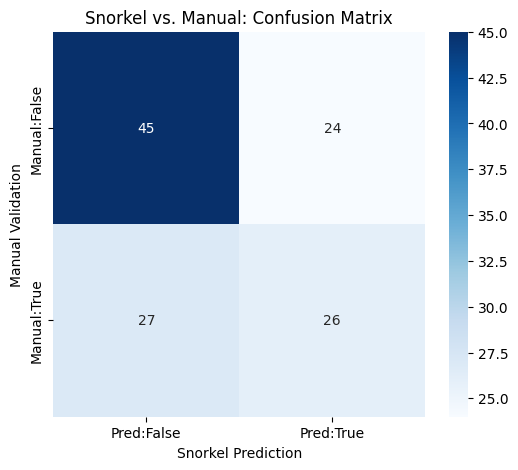

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred:False','Pred:True'],
            yticklabels=['Manual:False','Manual:True'])
plt.xlabel('Snorkel Prediction')
plt.ylabel('Manual Validation')
plt.title('Snorkel vs. Manual: Confusion Matrix')
plt.show()


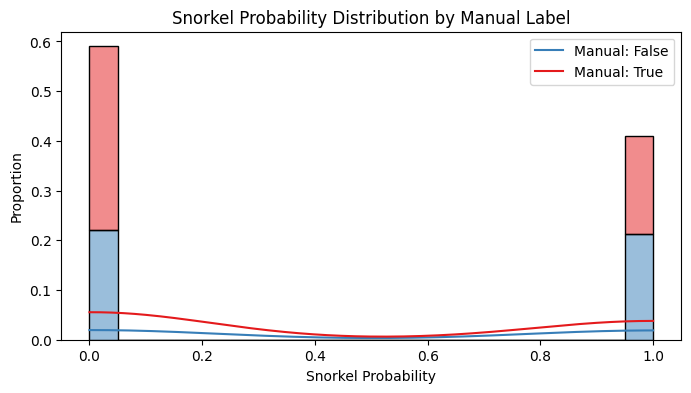

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(eval_df, x='snorkel_prob', hue='manualvalidation_bin', bins=20,
             stat='probability', kde=True, multiple='stack', palette='Set1')
plt.xlabel('Snorkel Probability')
plt.ylabel('Proportion')
plt.title('Snorkel Probability Distribution by Manual Label')
plt.legend(['Manual: False', 'Manual: True'])
plt.show()


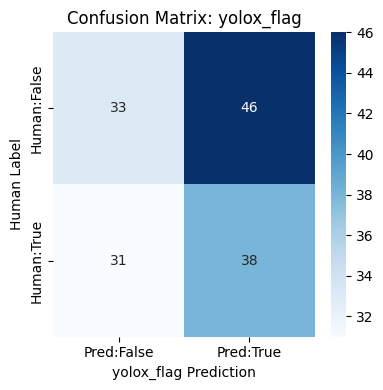

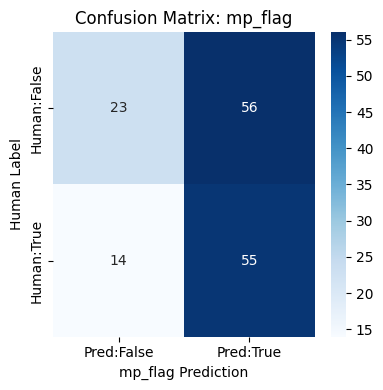

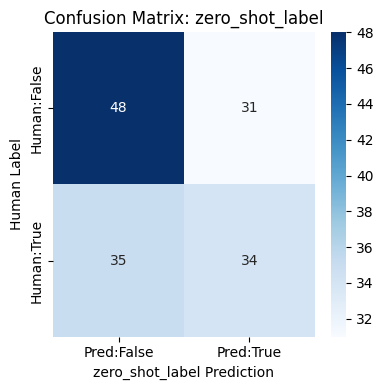


=== Model Performance Comparison ===
          Model  Accuracy  Precision  Recall  F1 Score
     yolox_flag     0.480      0.452   0.551     0.497
        mp_flag     0.527      0.495   0.797     0.611
zero_shot_label     0.554      0.523   0.493     0.507


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Unified reference (groundtruth if present, else manualvalidation)
def get_human_label(row):
    if pd.notnull(row['groundtruth']):
        return str(row['groundtruth']).strip().lower() in ['true','1','yes','t']
    elif pd.notnull(row['manualvalidation']):
        return str(row['manualvalidation']).strip().lower() in ['true','1','yes','t']
    else:
        return None
val_df['human_label'] = val_df.apply(get_human_label, axis=1)
mask = val_df['human_label'].notnull()
comp_df = val_df[mask].copy()
comp_df['human_label_bin'] = comp_df['human_label'].astype(int)

# Step 2: Define the models to compare
flag_cols = ['yolox_flag', 'mp_flag', 'zero_shot_label']
metrics_table = []

for flag in flag_cols:
    # Convert flags to binary (robust)
    comp_df[f'{flag}_bin'] = comp_df[flag].astype(str).str.lower().isin(['true','1','yes','t']).astype(int)
    y_pred = comp_df[f'{flag}_bin']
    y_true = comp_df['human_label_bin']

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    # Store for table
    metrics_table.append({
        "Model": flag,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    # Step 3: Draw Confusion Matrix Heatmap
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred:False','Pred:True'],
                yticklabels=['Human:False','Human:True'])
    plt.xlabel(f'{flag} Prediction')
    plt.ylabel('Human Label')
    plt.title(f'Confusion Matrix: {flag}')
    plt.tight_layout()
    plt.show()

# Step 4: Tabulate all metrics
import pandas as pd
metrics_df = pd.DataFrame(metrics_table)
print("\n=== Model Performance Comparison ===")
print(metrics_df.to_string(index=False, float_format="%.3f"))


In [ ]:
# For YOLOX, MP, zero-shot: use unified human label (from groundtruth or manualvalidation)
comp_df['human_label_bin'] = comp_df['human_label'].astype(int)

# For snorkel: restrict to groundtruth missing & manualvalidation present
snorkel_mask = comp_df['groundtruth'].isnull() & comp_df['manualvalidation'].notnull()
comp_snorkel = comp_df[snorkel_mask].copy()
comp_snorkel['manualvalidation_bin'] = comp_snorkel['manualvalidation'].astype(str).str.lower().isin(['true','1','yes','t']).astype(int)


In [ ]:
summary_with_n = []

for flag in flag_cols:
    y_pred = comp_df[f'{flag}_bin']
    y_true = comp_df['human_label_bin']

    mask_pos = (y_true == 1)
    mask_neg = (y_true == 0)
    acc_pos = (y_pred[mask_pos] == 1).mean() if mask_pos.sum() else np.nan
    acc_neg = (y_pred[mask_neg] == 0).mean() if mask_neg.sum() else np.nan
    n_pos = mask_pos.sum()
    n_neg = mask_neg.sum()

    summary_with_n.append({
        "Model": flag,
        "Accuracy on True": acc_pos,
        "N True": n_pos,
        "Accuracy on False": acc_neg,
        "N False": n_neg
    })

# SNORKEL: only compare on rows with groundtruth missing, manualvalidation present
flag = 'snorkel_label'
y_pred = comp_snorkel[flag].astype(str).str.lower().isin(['true','1','yes','t']).astype(int)
y_true = comp_snorkel['manualvalidation_bin']

mask_pos = (y_true == 1)
mask_neg = (y_true == 0)
acc_pos = (y_pred[mask_pos] == 1).mean() if mask_pos.sum() else np.nan
acc_neg = (y_pred[mask_neg] == 0).mean() if mask_neg.sum() else np.nan
n_pos = mask_pos.sum()
n_neg = mask_neg.sum()

summary_with_n.append({
    "Model": flag,
    "Accuracy on True": acc_pos,
    "N True": n_pos,
    "Accuracy on False": acc_neg,
    "N False": n_neg
})

summary_n_df = pd.DataFrame(summary_with_n)


In [ ]:

df_true = summary_n_df[['Model', 'Accuracy on True', 'N True']].copy()
df_true['Class'] = 'True'
df_true.rename(columns={'Accuracy on True': 'Class Accuracy', 'N True': 'N'}, inplace=True)

df_false = summary_n_df[['Model', 'Accuracy on False', 'N False']].copy()
df_false['Class'] = 'False'
df_false.rename(columns={'Accuracy on False': 'Class Accuracy', 'N False': 'N'}, inplace=True)

plot_df = pd.concat([df_true, df_false], ignore_index=True)


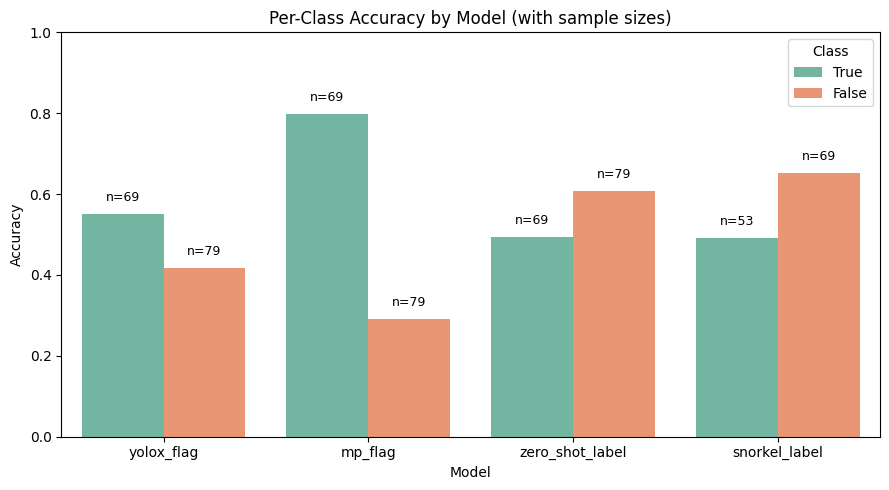

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))
ax = sns.barplot(
    data=plot_df,
    x='Model', y='Class Accuracy', hue='Class', palette='Set2'
)
plt.title('Per-Class Accuracy by Model (with sample sizes)')
plt.ylim(0, 1)
plt.ylabel('Accuracy')

# Add sample size (n=) to bars
for p, n in zip(ax.patches, plot_df['N']):
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f"n={int(n)}",
                    (p.get_x() + p.get_width() / 2, height + 0.025),
                    ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()
